## Board Game Review Prediction

In [1]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #Linear Algebra
import math #For performing Mathematical Operations
import matplotlib.pyplot as plt #For plotting and Data Visualisation
import seaborn as sns #For plotting and Data Visualisation
from sklearn.model_selection import train_test_split #Splitting data into train and test data
import sklearn.metrics #For classification score
from sklearn.preprocessing import MinMaxScaler #For Data Preprocessing
from collections import Counter #An unordered collection like Dictionary
import sklearn.tree as tree  #Create a tree
from sklearn.linear_model import LinearRegression #For performing Linear Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data.
games = pd.read_csv("games.csv")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

games.info()

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplay

Data-set has around 20 features, and around 81,312 rows of data. It can be noticed from the results of df.info(), that some of the rows have some empty features. For example, minplaytime only has 81309 non null values whereas almost al of the other have 81,312 non null values. Rows with any one of empty feature value is dropped from the analysis.

The dependent variable here is average_rating. The data-set is split into two parts, one part is used for training the model while the other portion is used to test the data. The performance of the model is also evaluated using this test data.

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

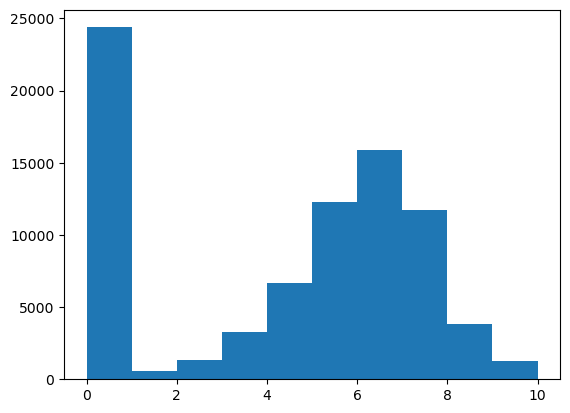

In [3]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

In the above distribution curve, it can be observed that many of the rows have the average rating of zero (which is not possible, since minimum allowed rating is 1); these rows are dropped from the analysis, as such rows are the result of dependent variables having irrationl values, or in many cases null values. As can be seen below, 24,380 rows have average rating equal to zero.

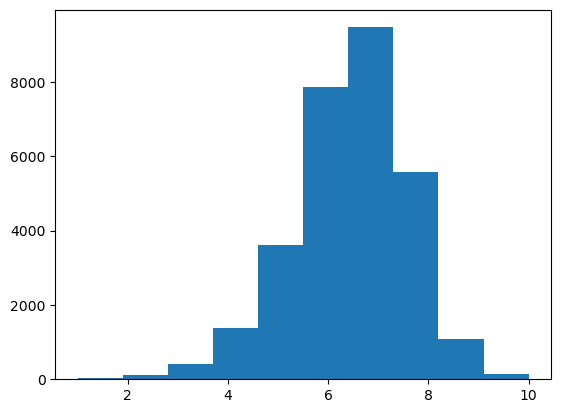

In [4]:
# games[games["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
#print(games[games["average_rating"] == 0].iloc[0])

# eliminating all the rows having average_rating = 0, since average rating can not be less than 1.
# Print the first row of all the games with scores greater than 0.
#print(games[games["average_rating"] > 0].iloc[0])

# Remove any rows without user reviews.
# Selecting games for which number of users who rated the game is greater than zero.
games = games[games["users_rated"] > 0]

games = games[games["total_wishers"] > 0]
games = games[games["average_weight"] > 0]
games = games[games["yearpublished"] > 0]

# Remove any rows with missing values.
games = games.dropna(axis=0)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [5]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

dfx=games[columns] #The features
dfy=games["average_rating"] #Target  

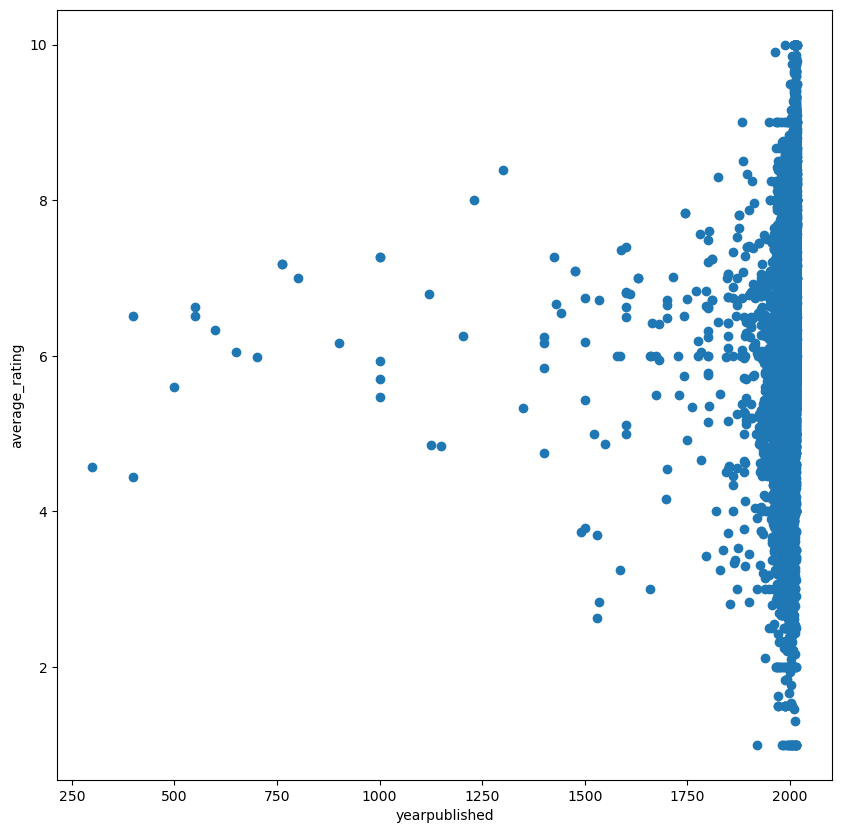

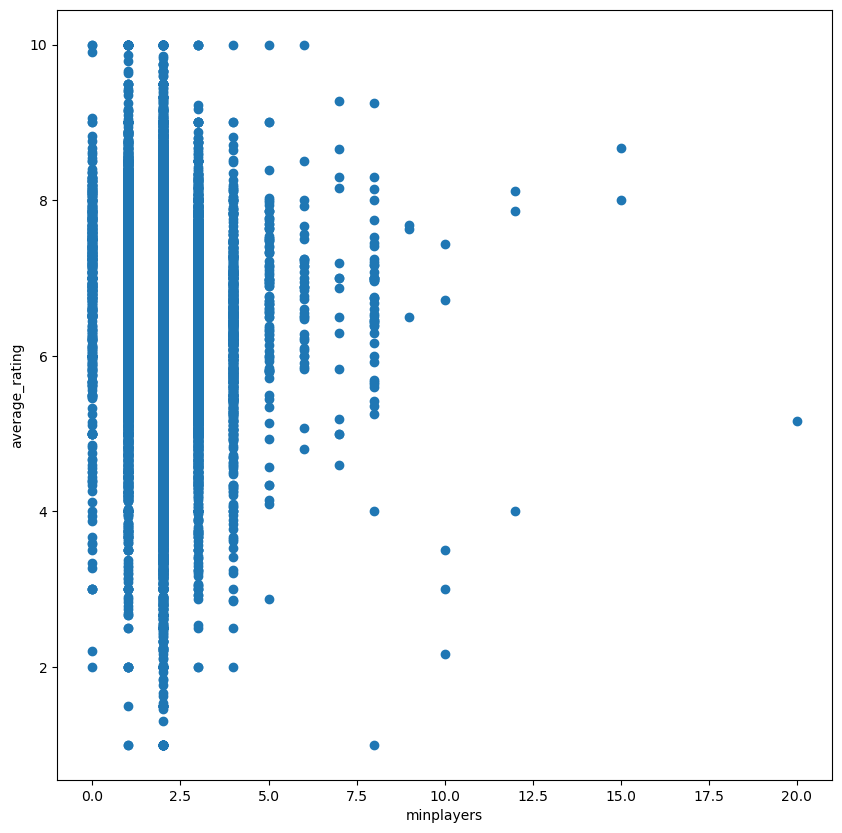

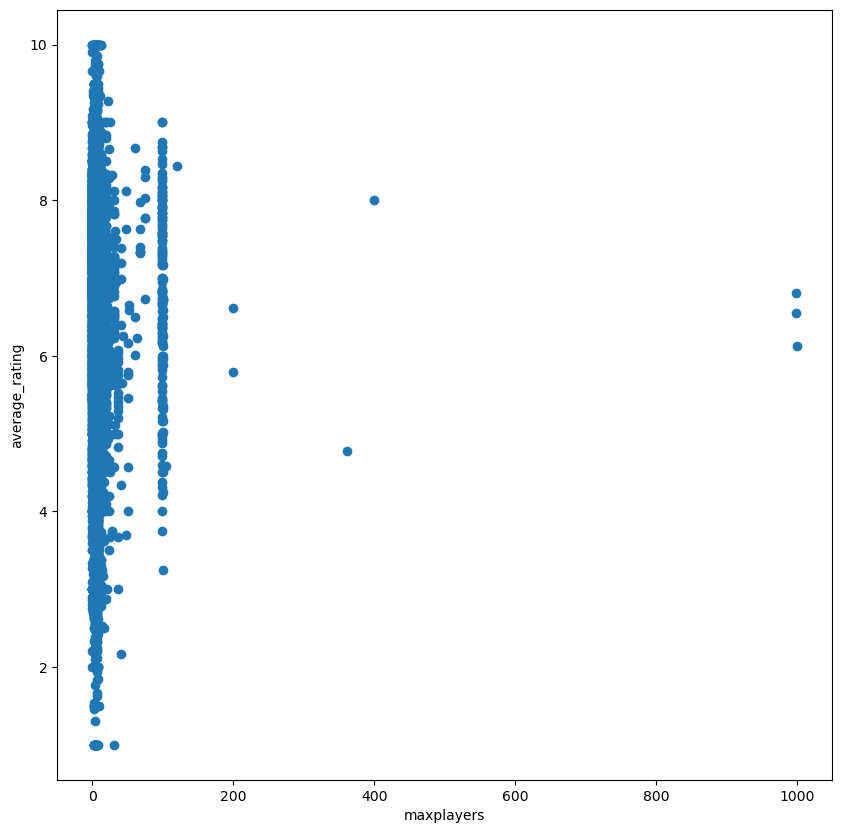

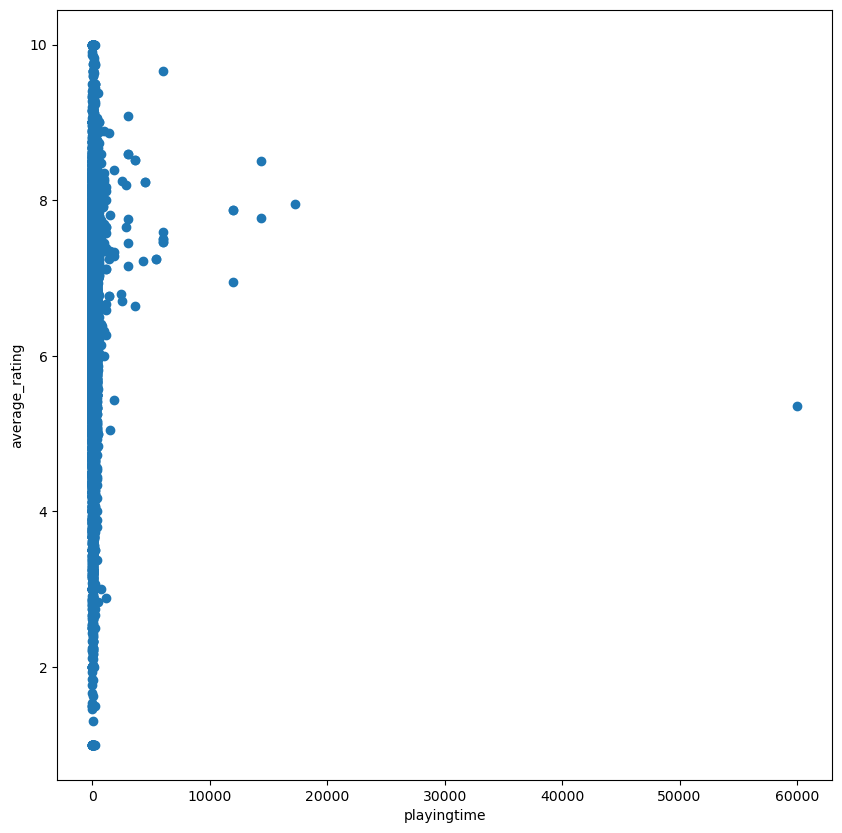

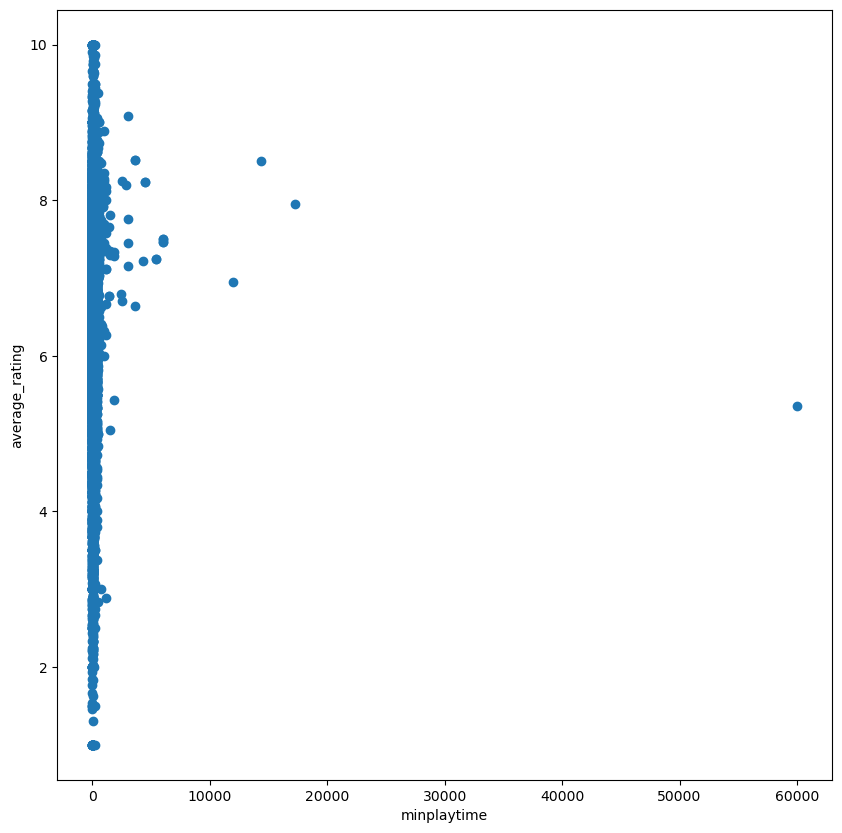

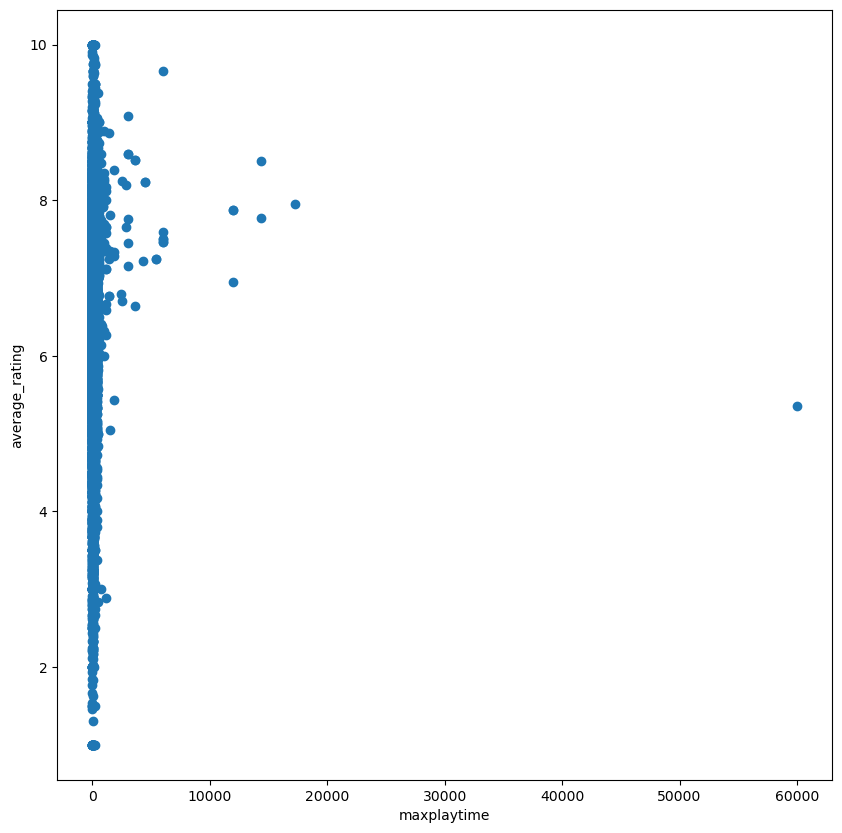

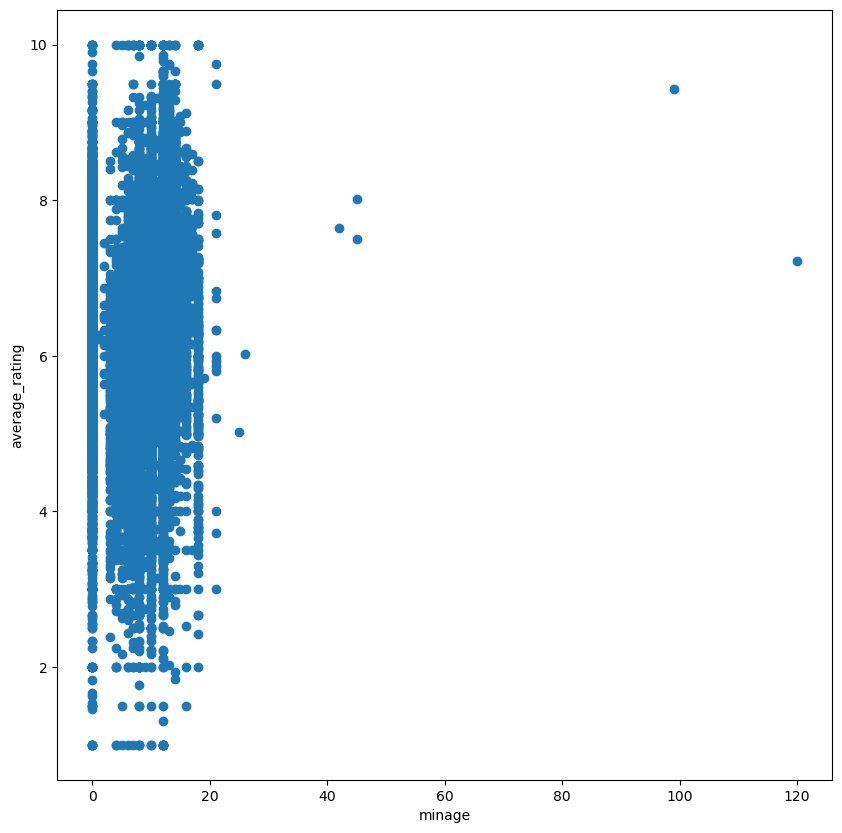

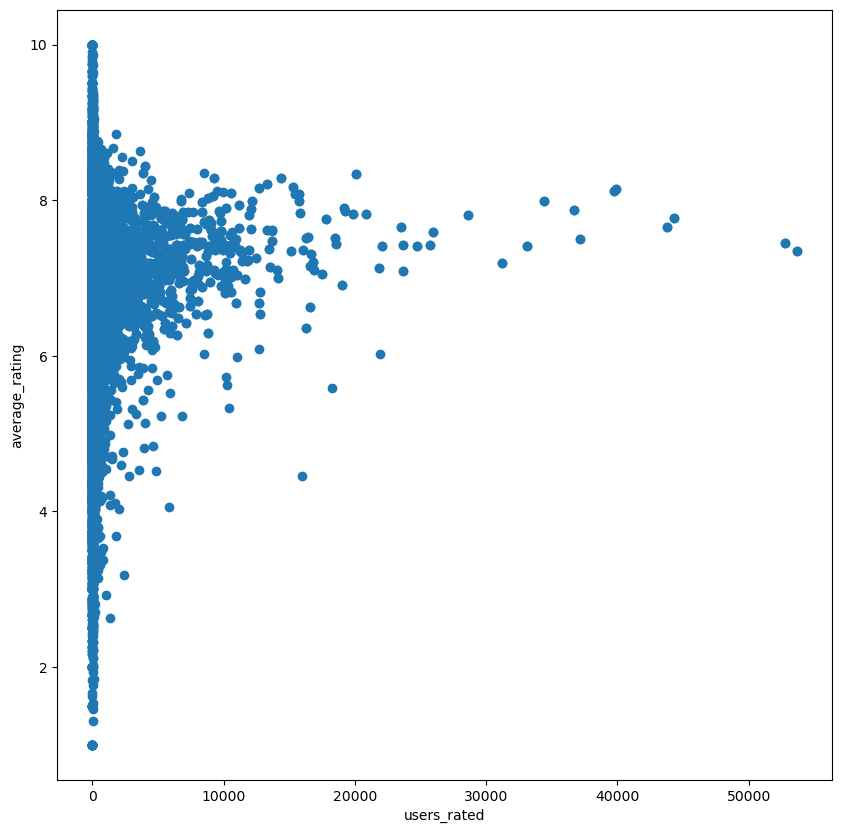

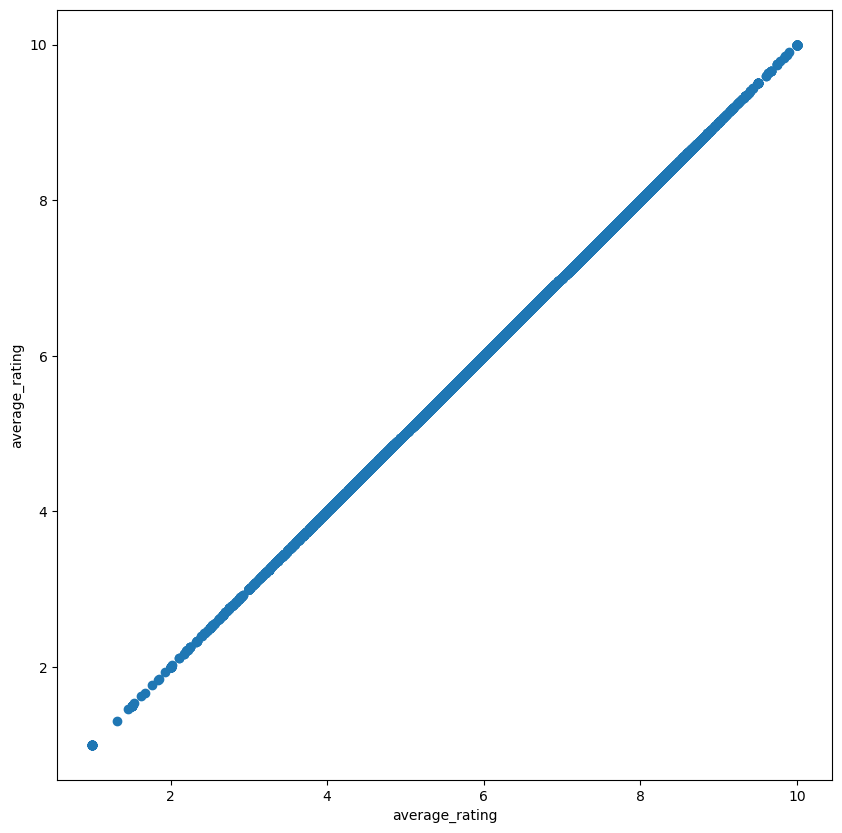

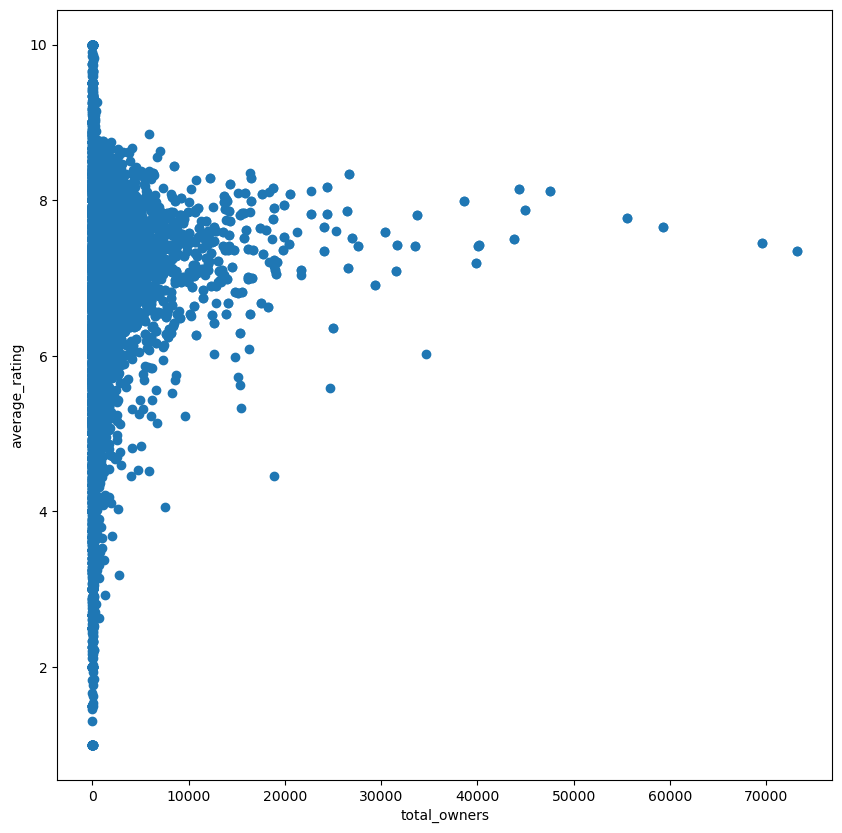

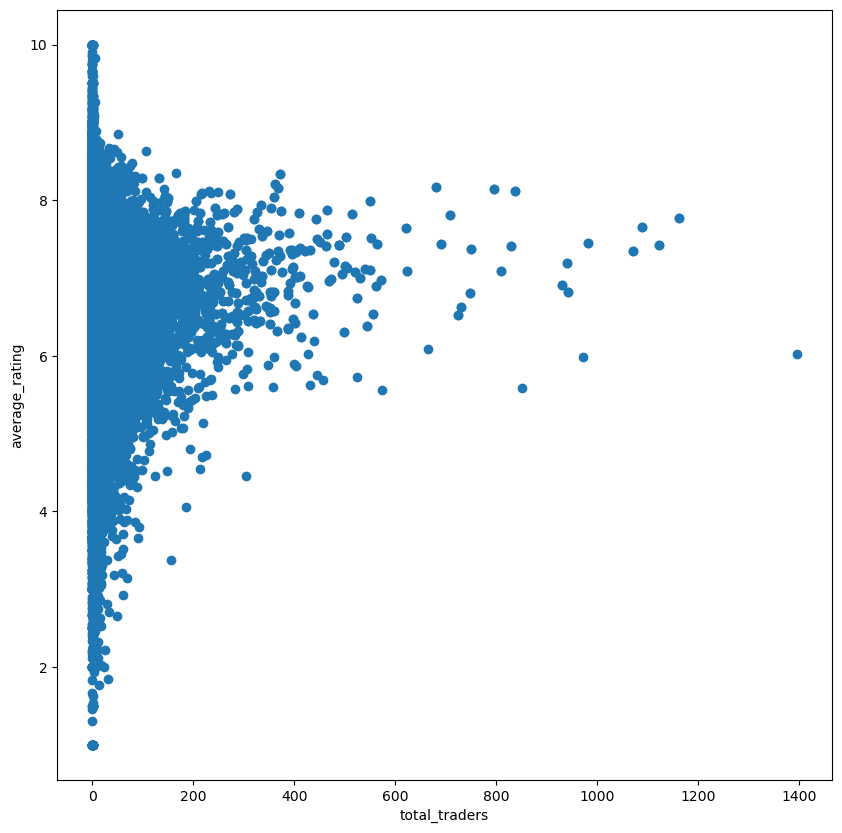

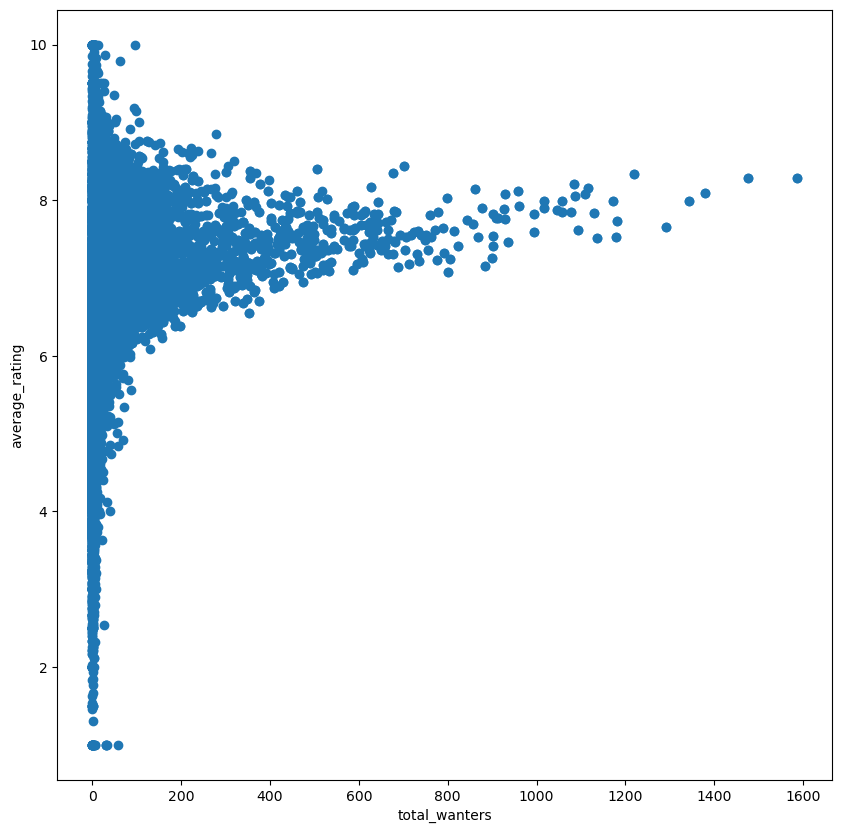

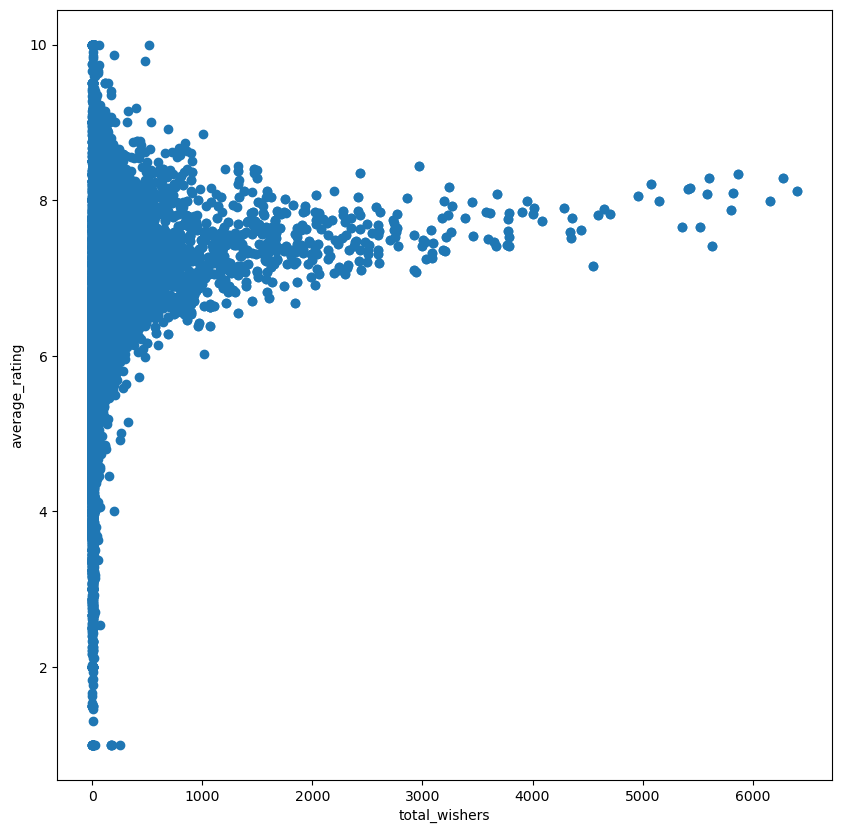

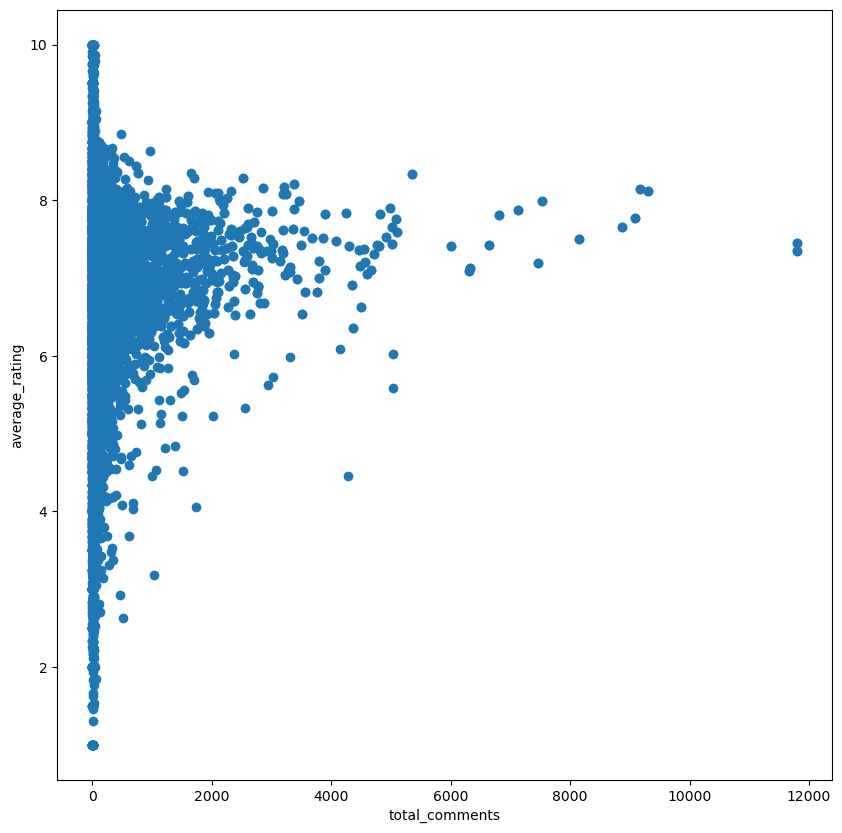

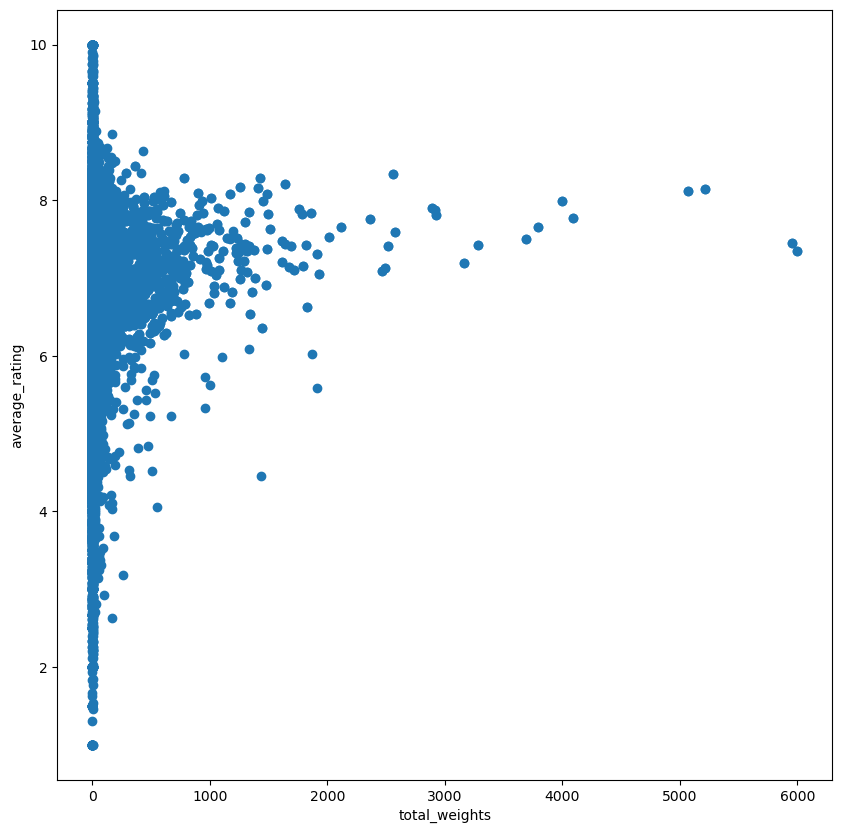

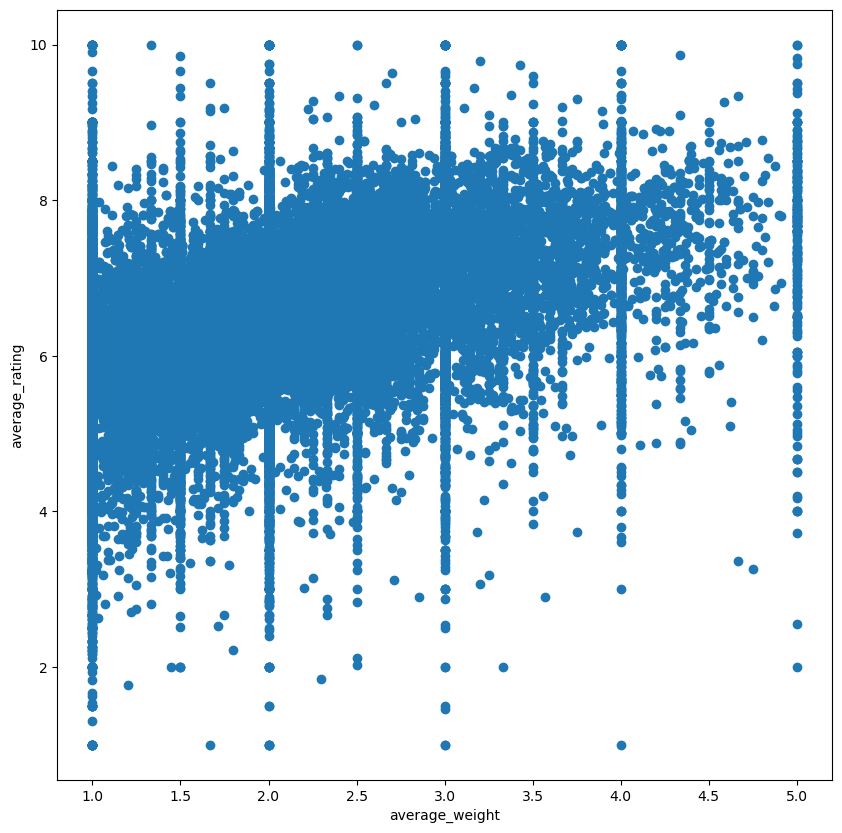

In [6]:
for i in range(len(dfx.columns)):  
    x = dfx.iloc[:,i].values
    y = dfy.values
    plt.figure(figsize=(10,10))
    plt.scatter(x, y)
    plt.xlabel(dfx.columns[i])
    plt.ylabel("average_rating")
    plt.show()

For the plot between average_rating and year published, there are plenty of boardgames, where year published is near 0 to 250. All these rows with illogical data are dropped. The analysis is restricted for the board games whose publishing year is after 1800. Similiarly, other modifications are conducted to the data-set to eliminate extreme ends of the data and to make the model more generalised. The modification to the data-set is listed below.

The shape of the data-frame after modification reveals the number of rows lost in dataframe modification, approximately, 5000 rows are lost in the modification. But that is okay since most of these data were extreme and at times it made no sense to use them either for training or testing.

In [7]:
dfx = dfx[dfx["yearpublished"]>1800]
dfx = dfx[dfx["minplayers"]<15]
dfx = dfx[dfx["maxplayers"]<100]
dfx = dfx[dfx["playingtime"]<500]
dfx = dfx[dfx["minage"]<20]
dfx = dfx[dfx["minplaytime"]<200]
dfx = dfx[dfx["maxplaytime"]<200]
print(dfx.shape)

(27803, 16)


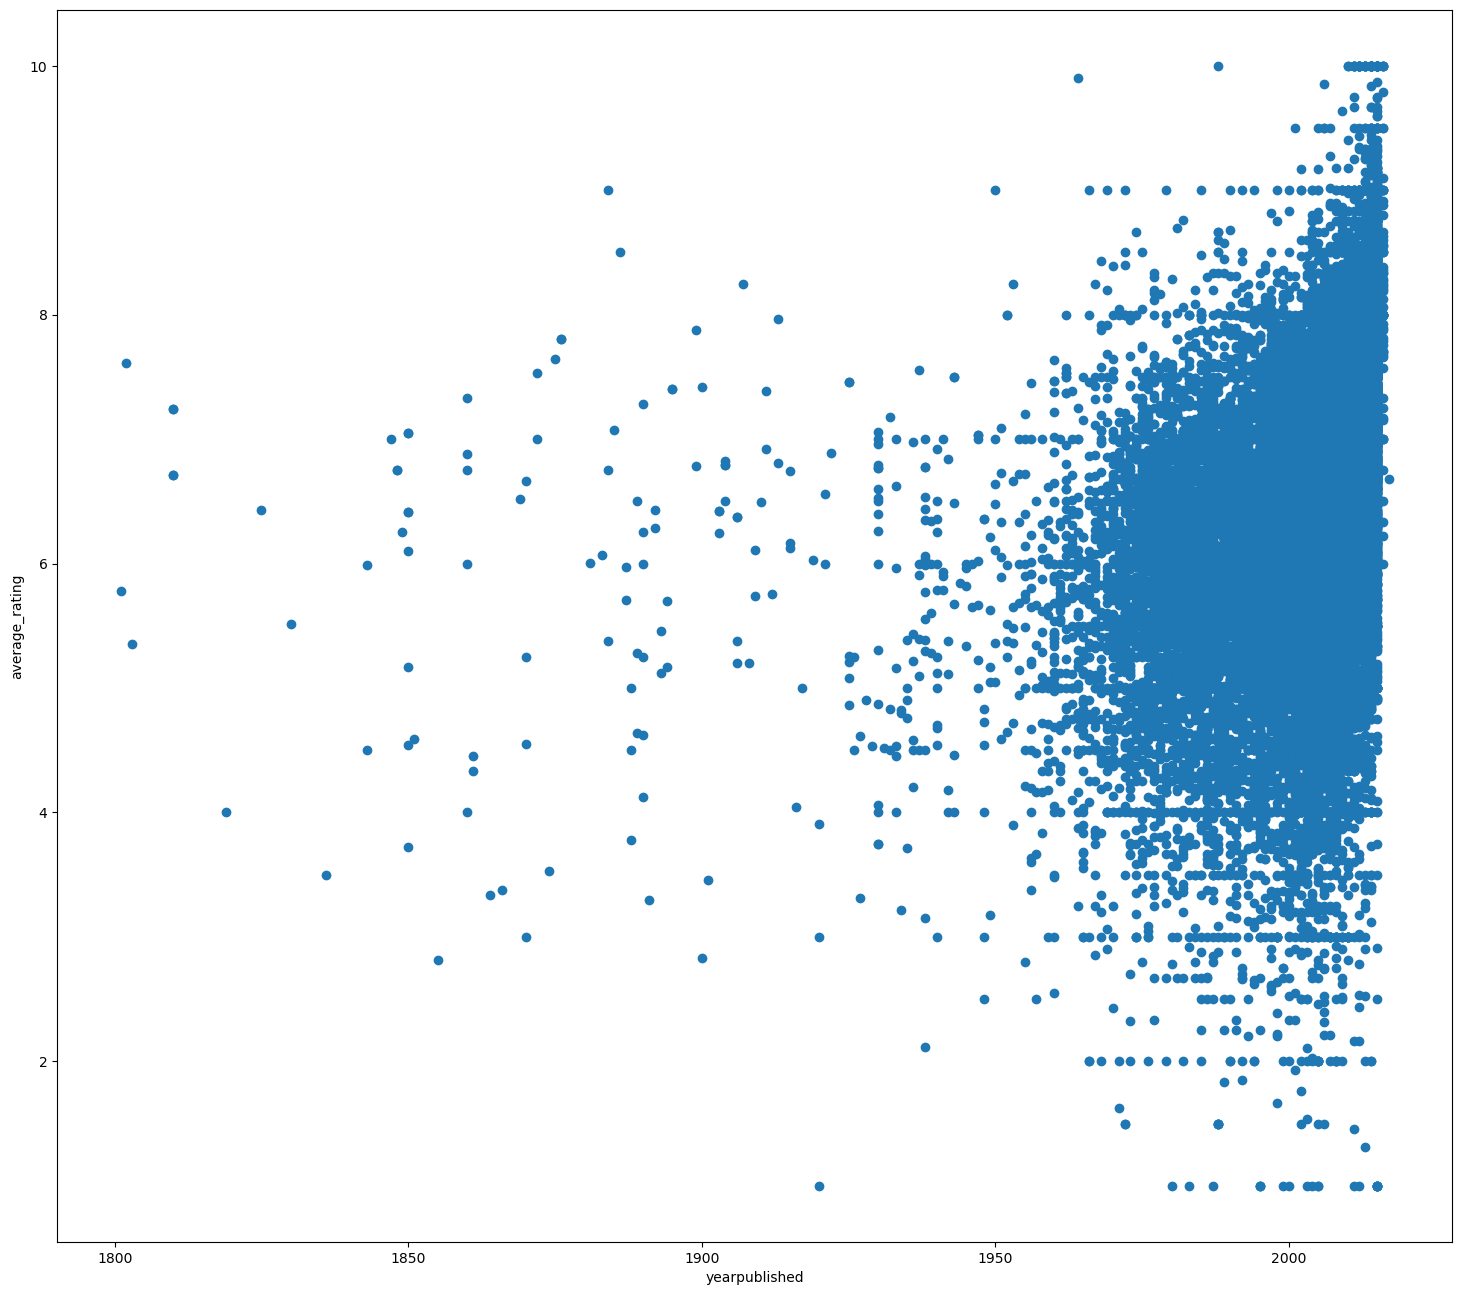

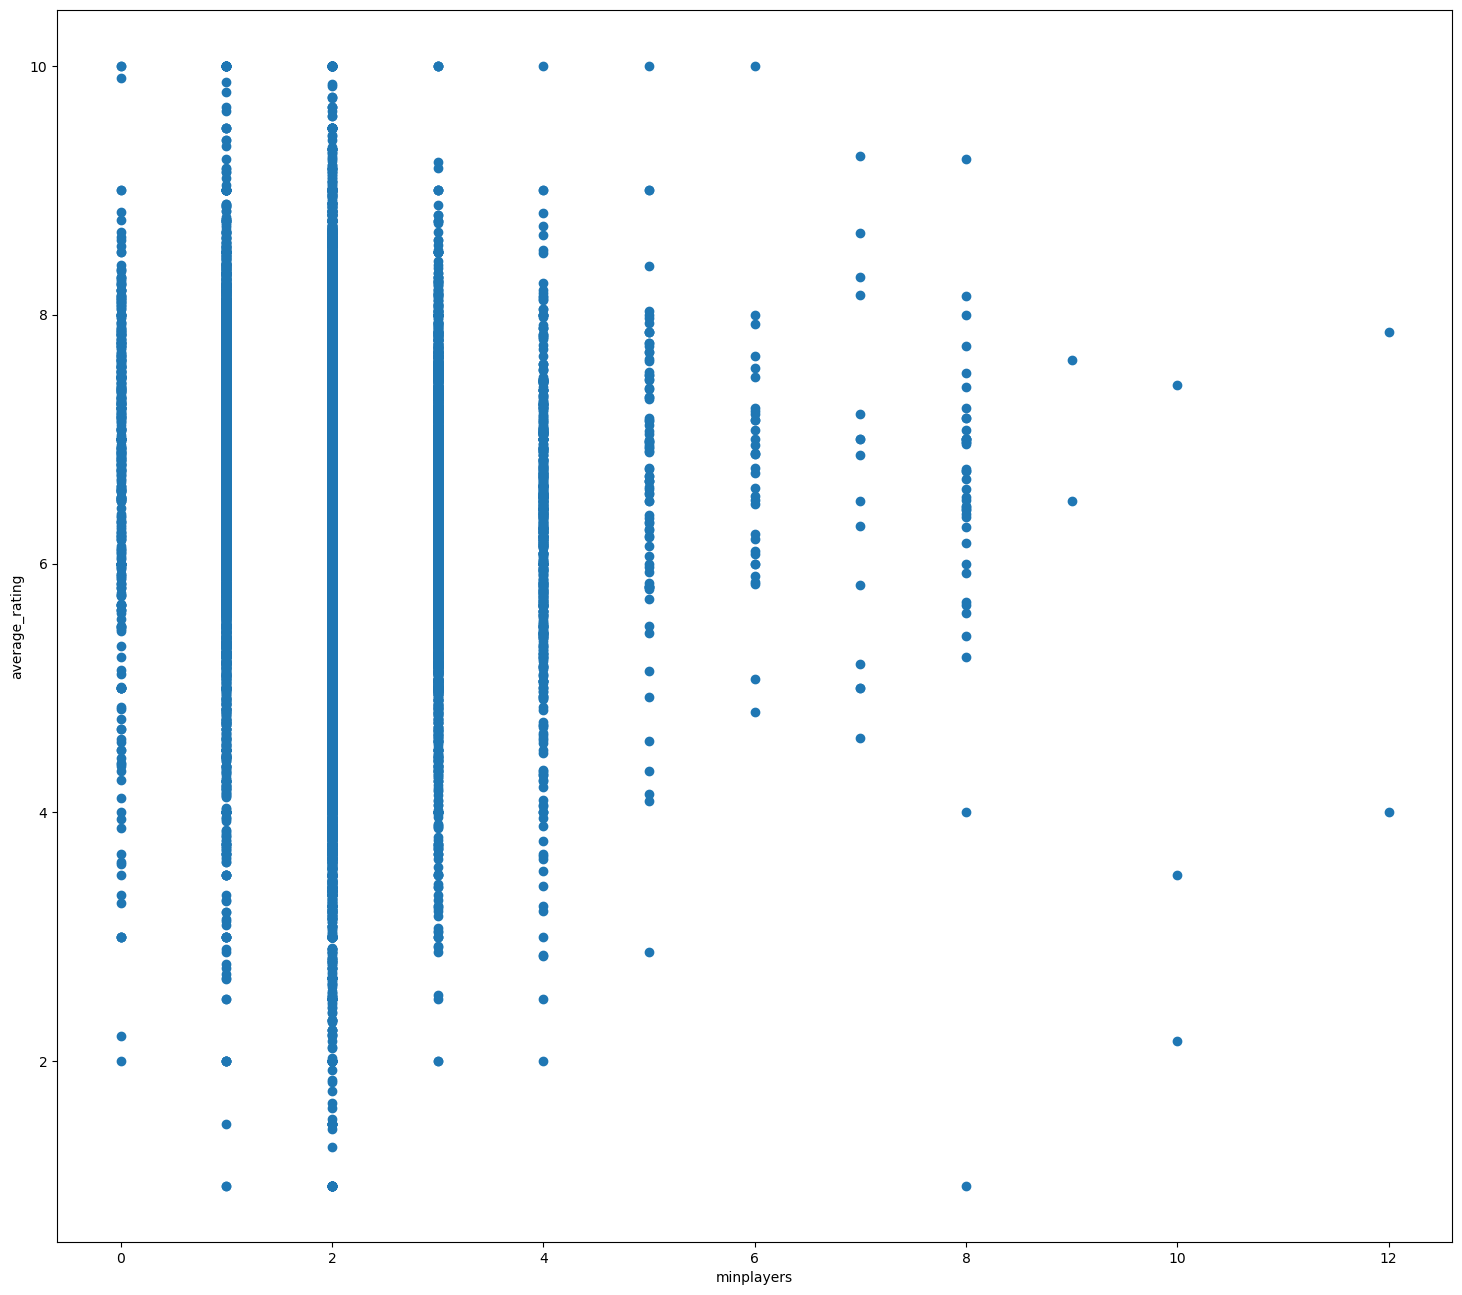

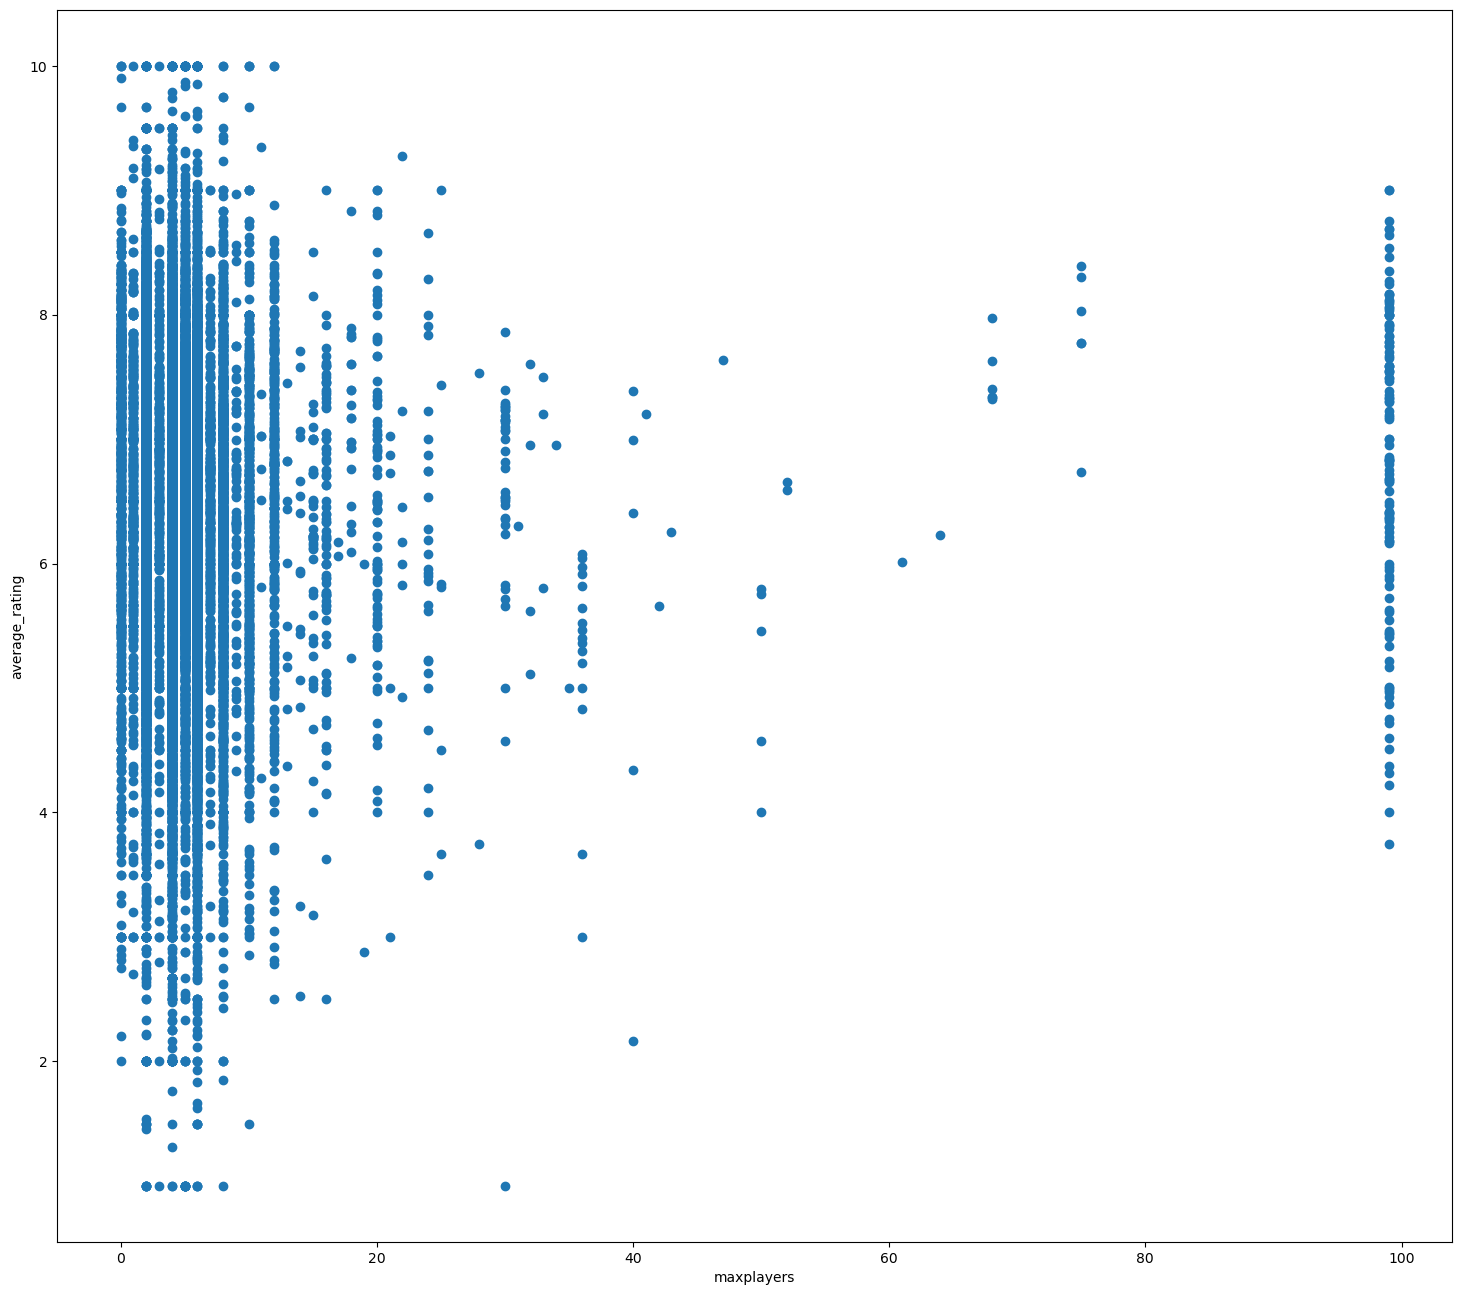

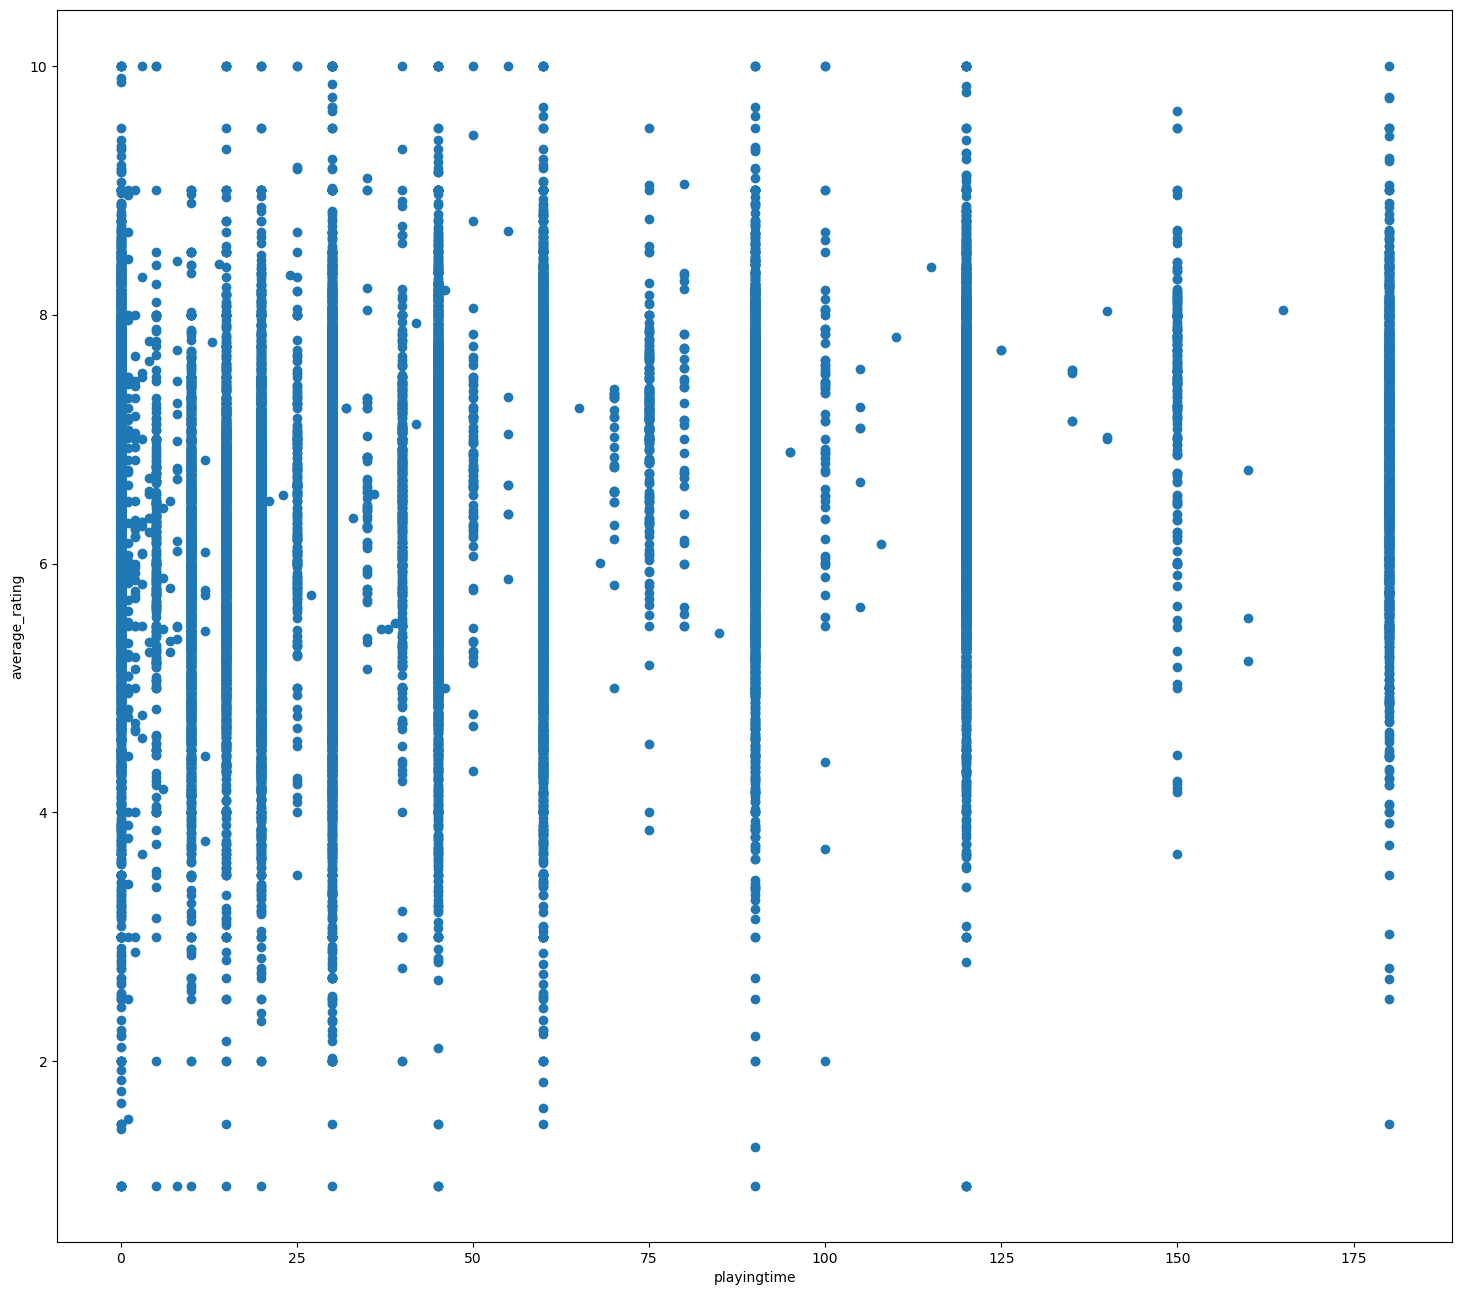

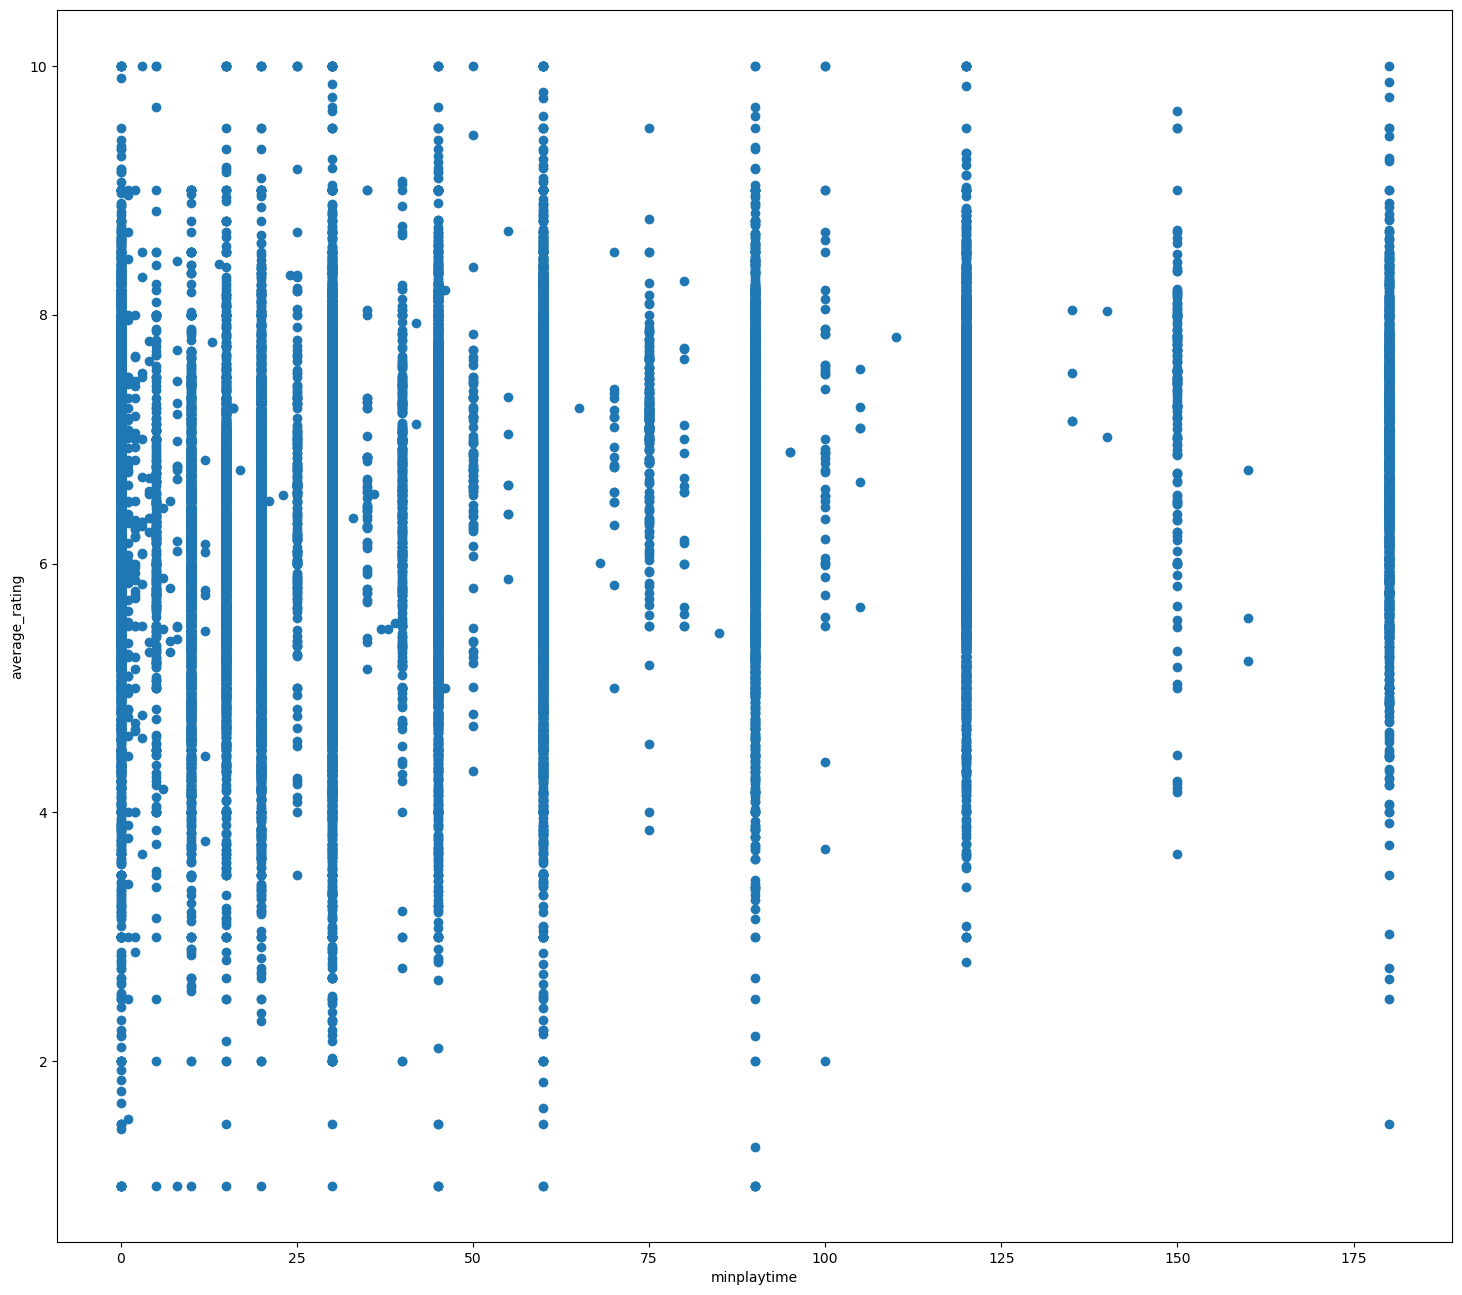

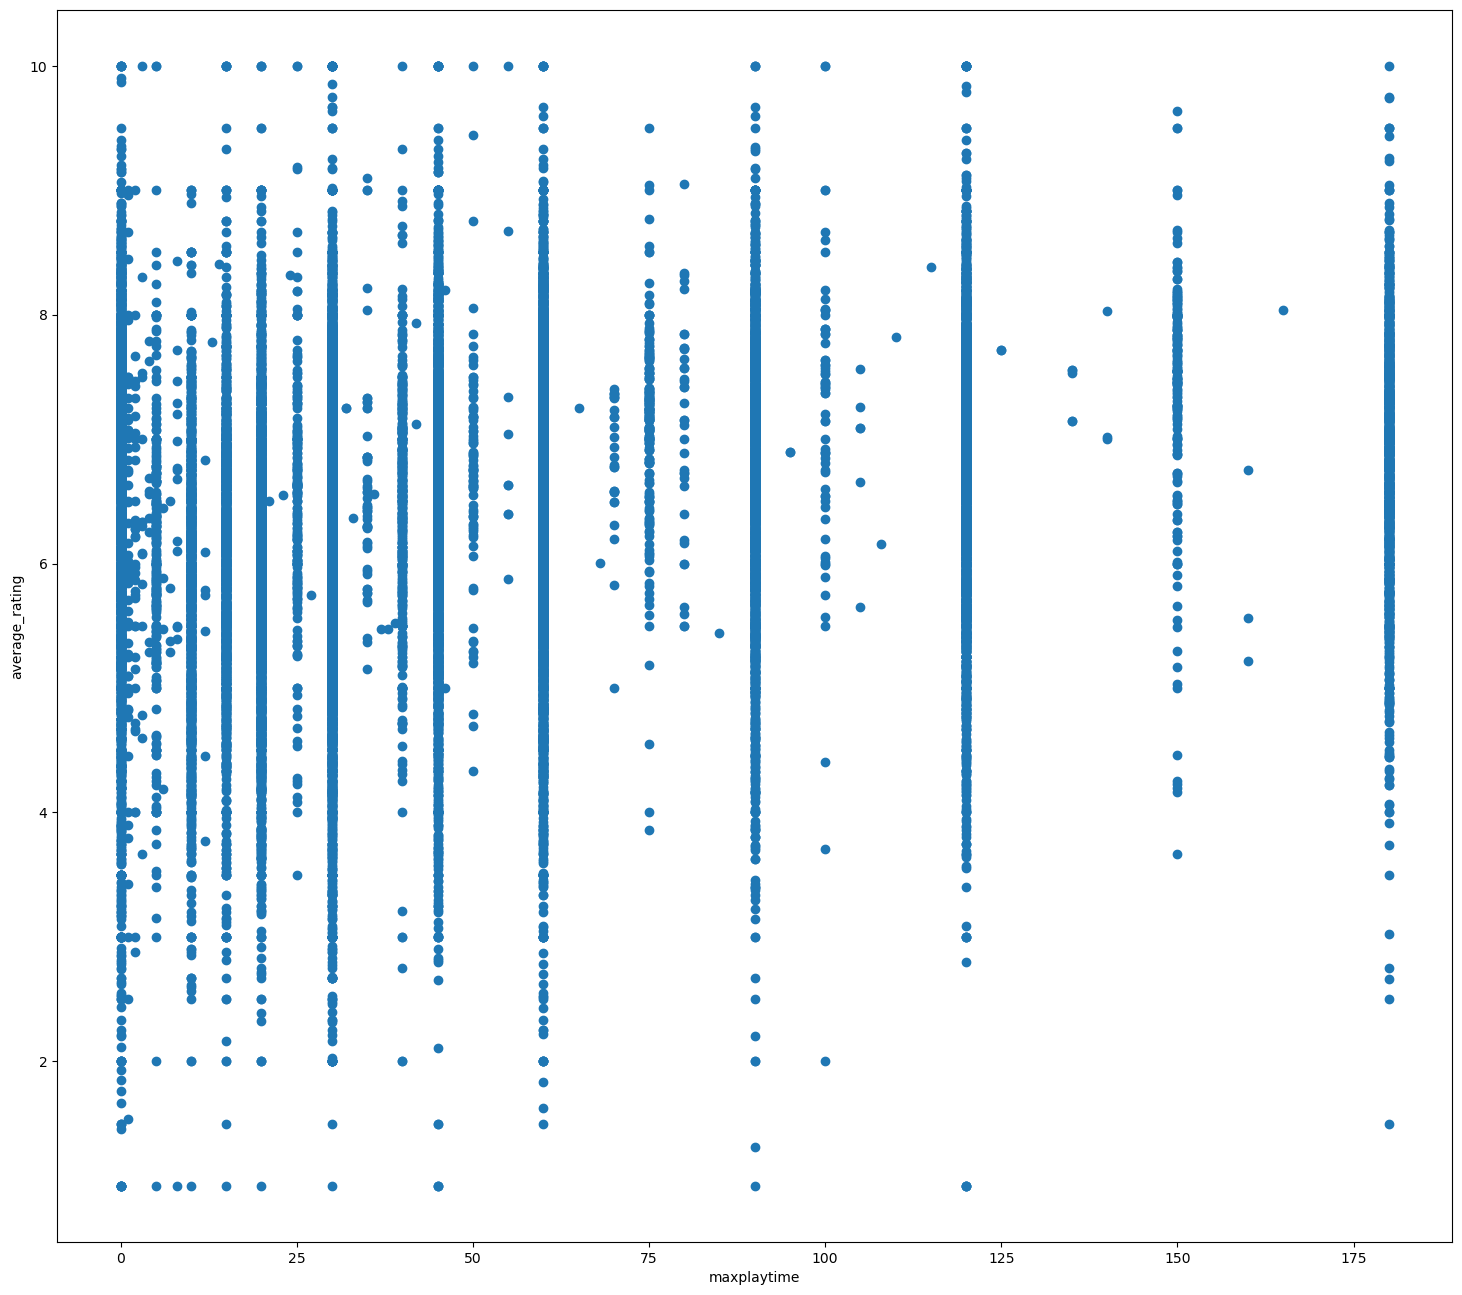

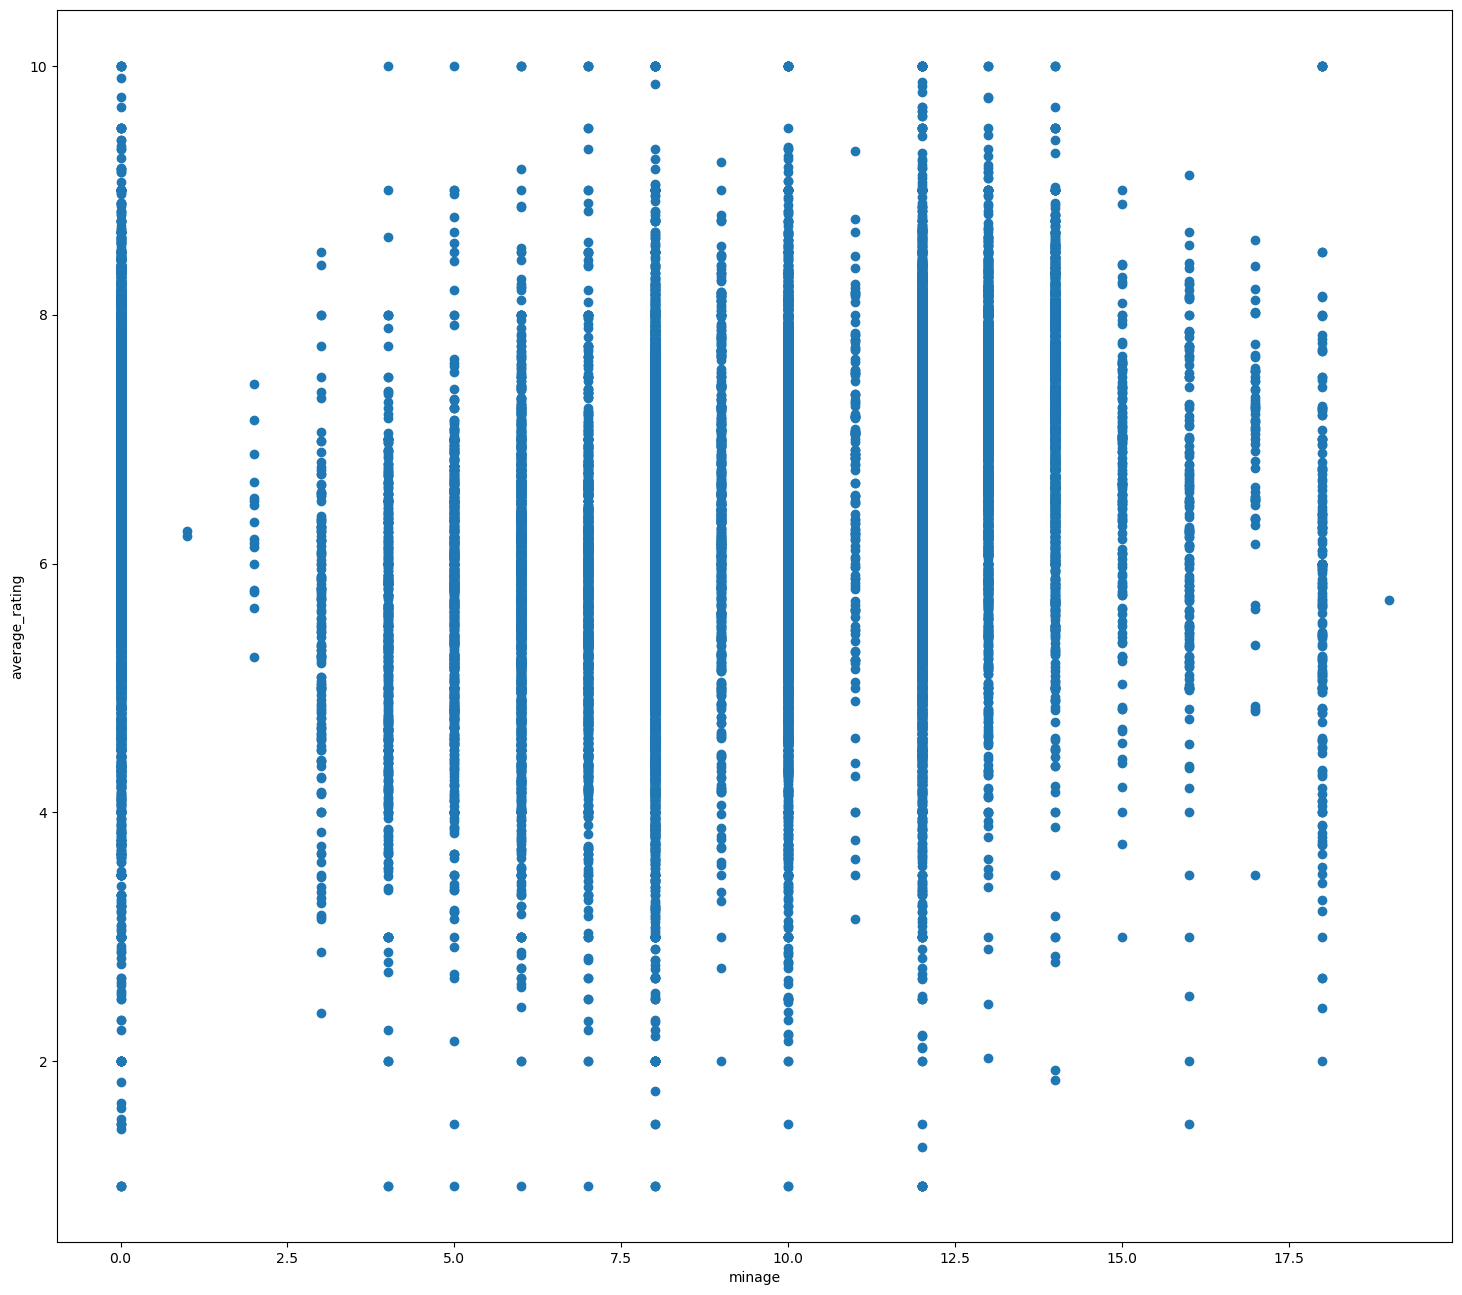

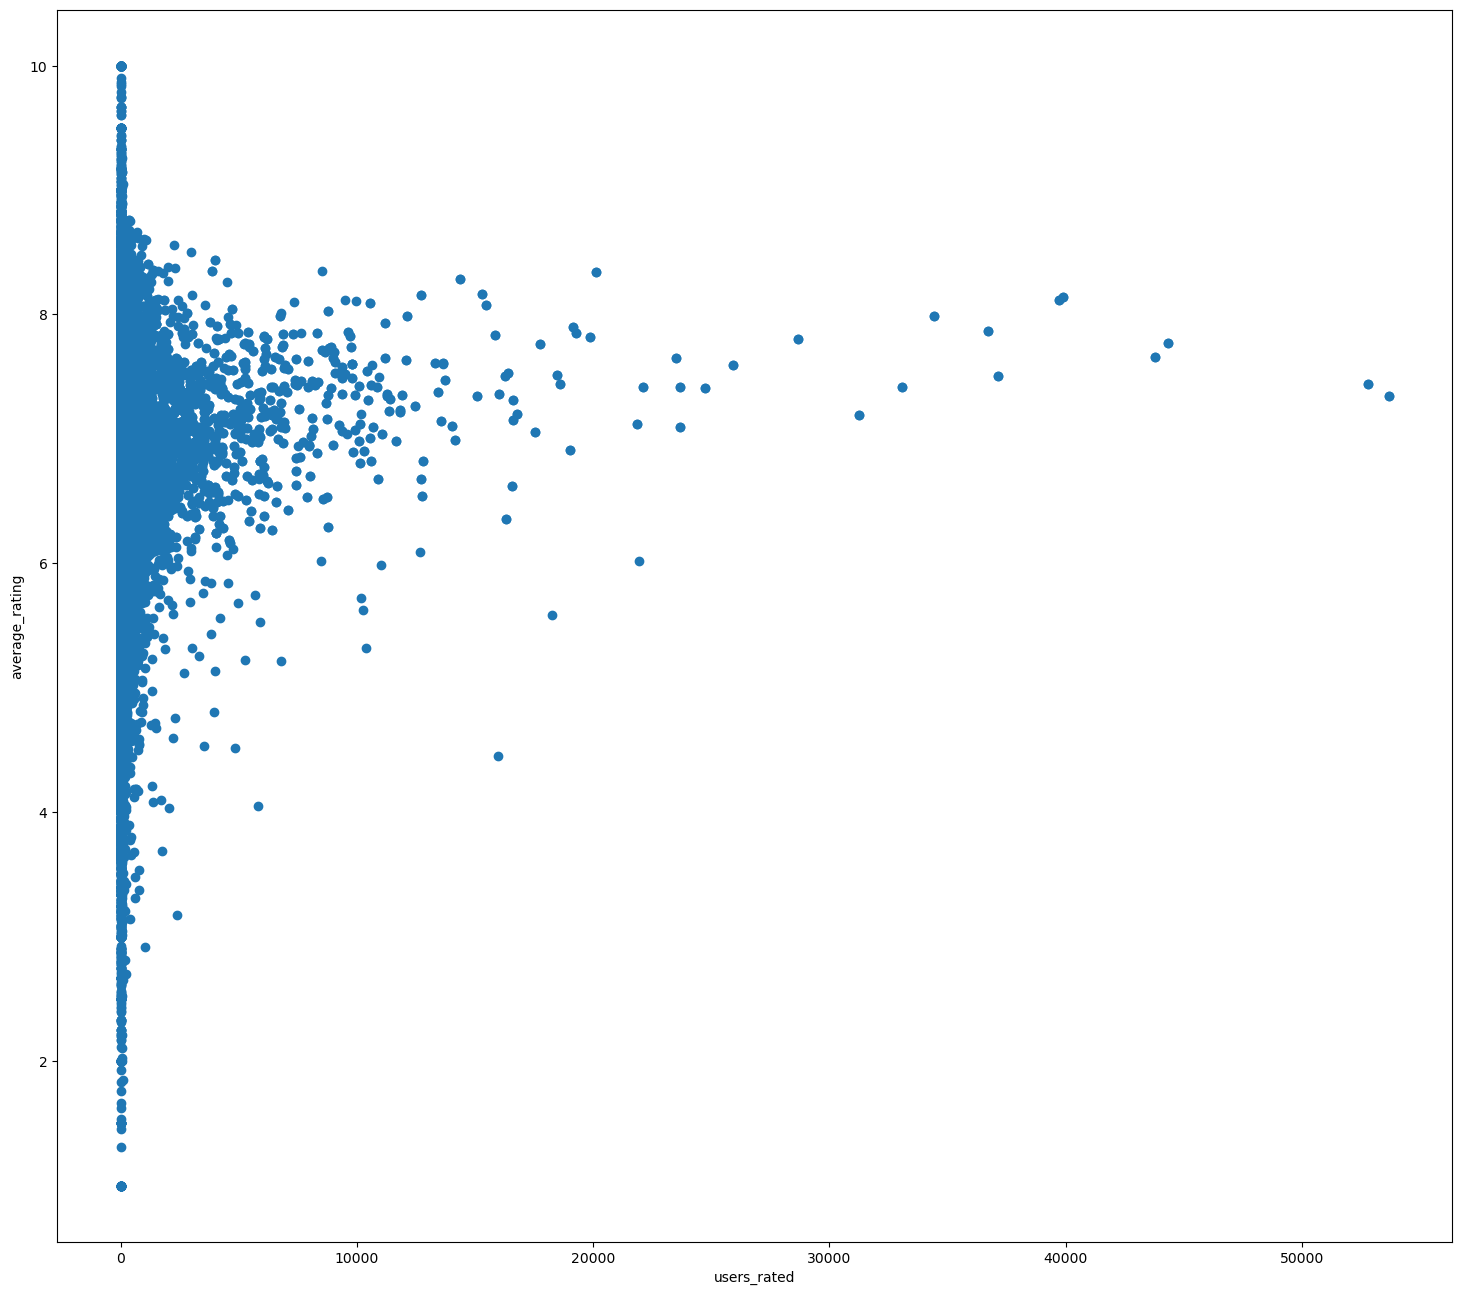

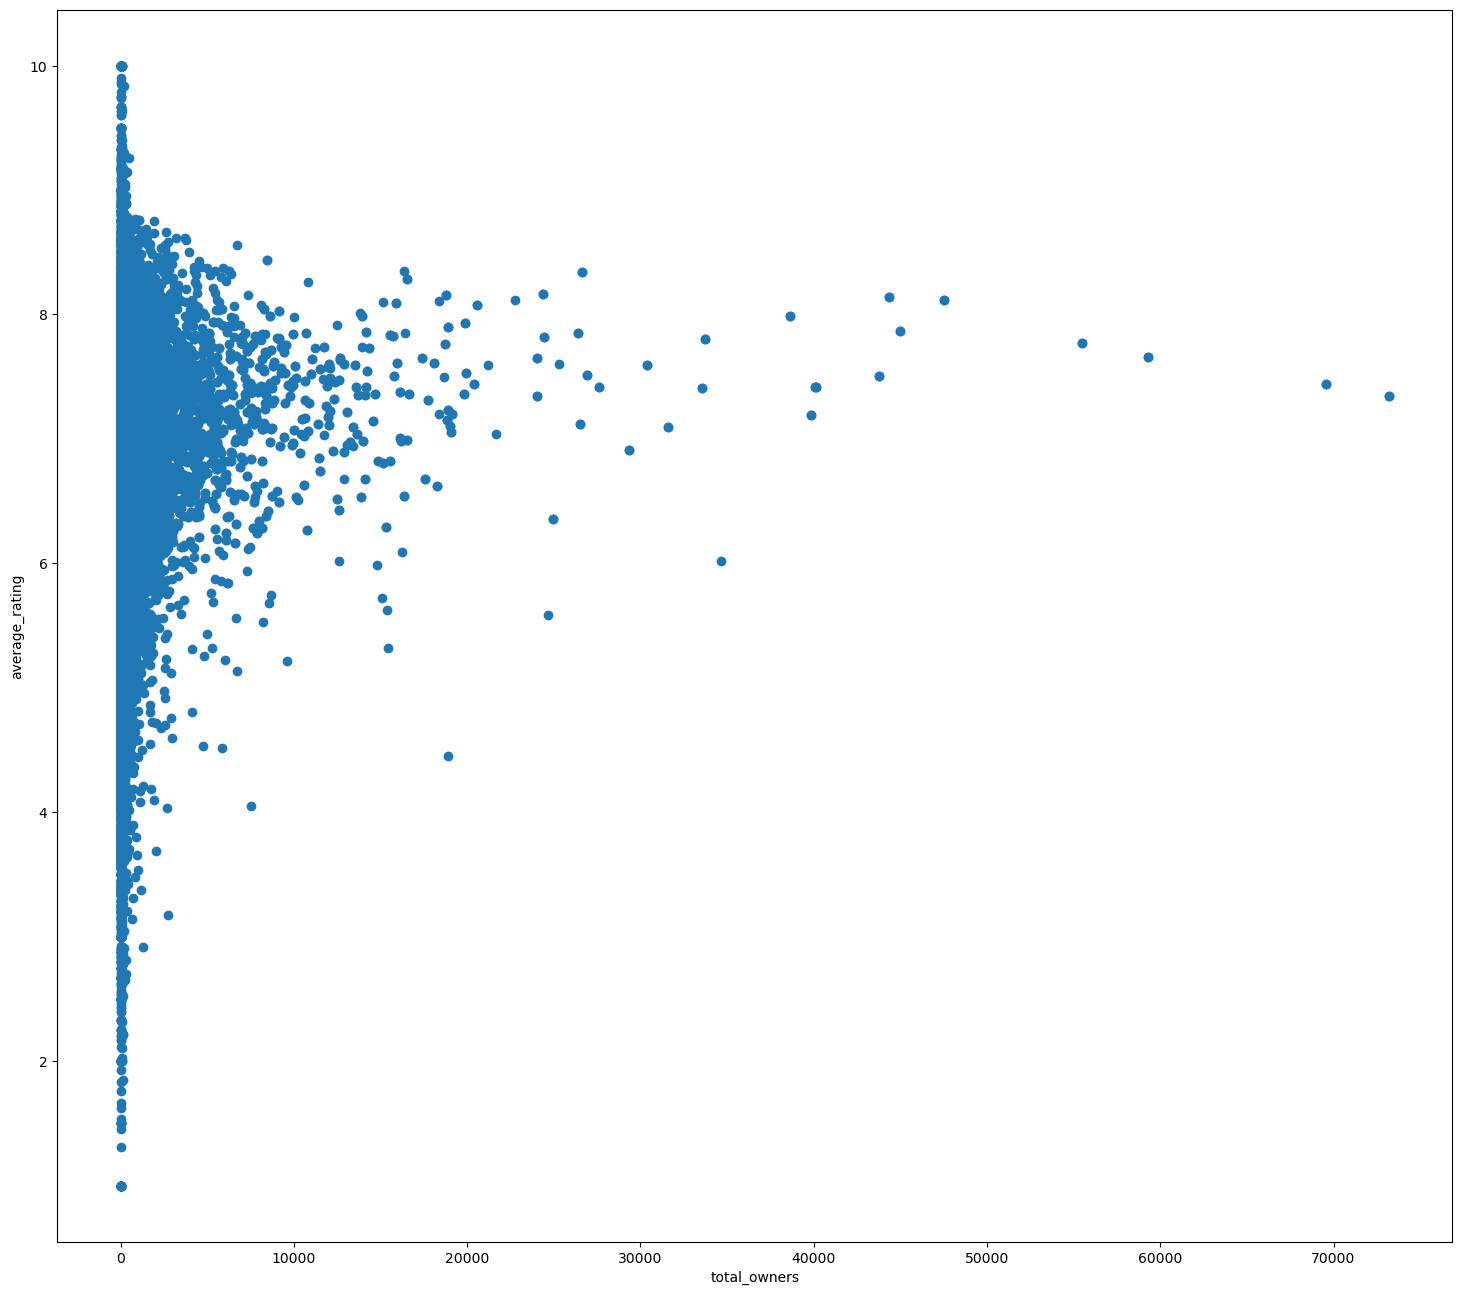

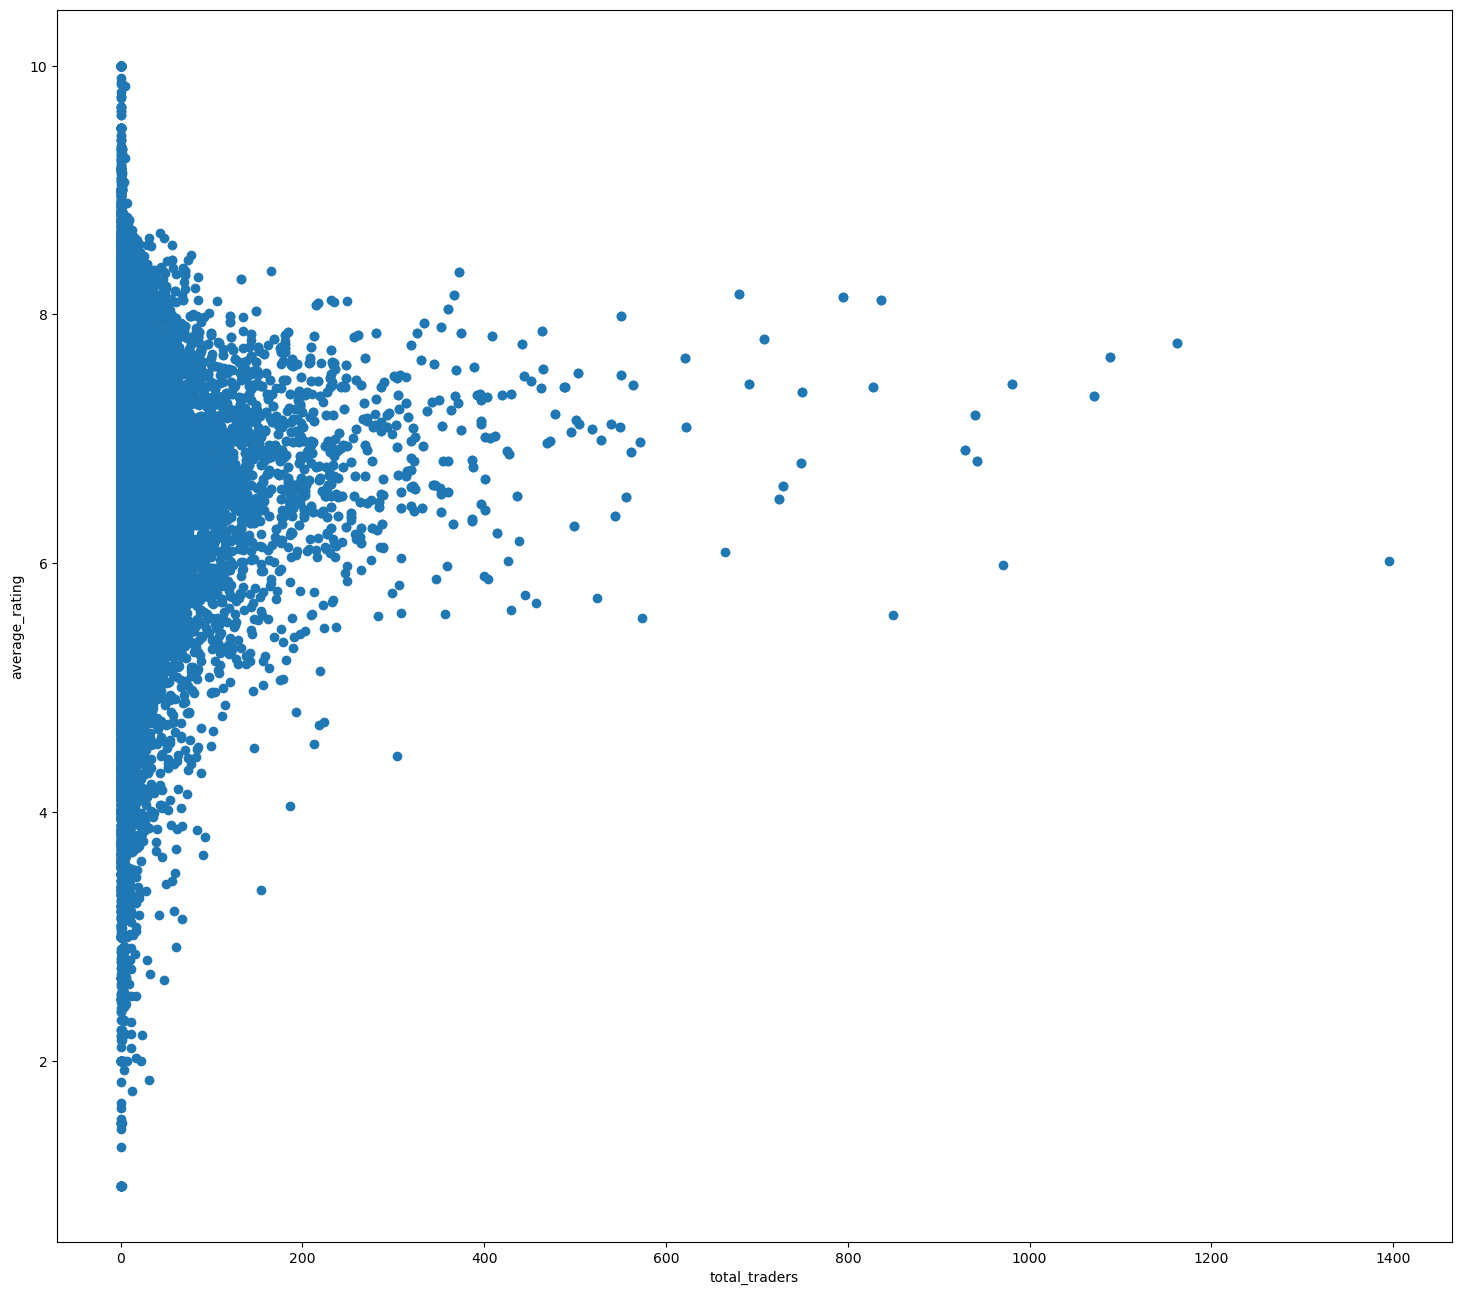

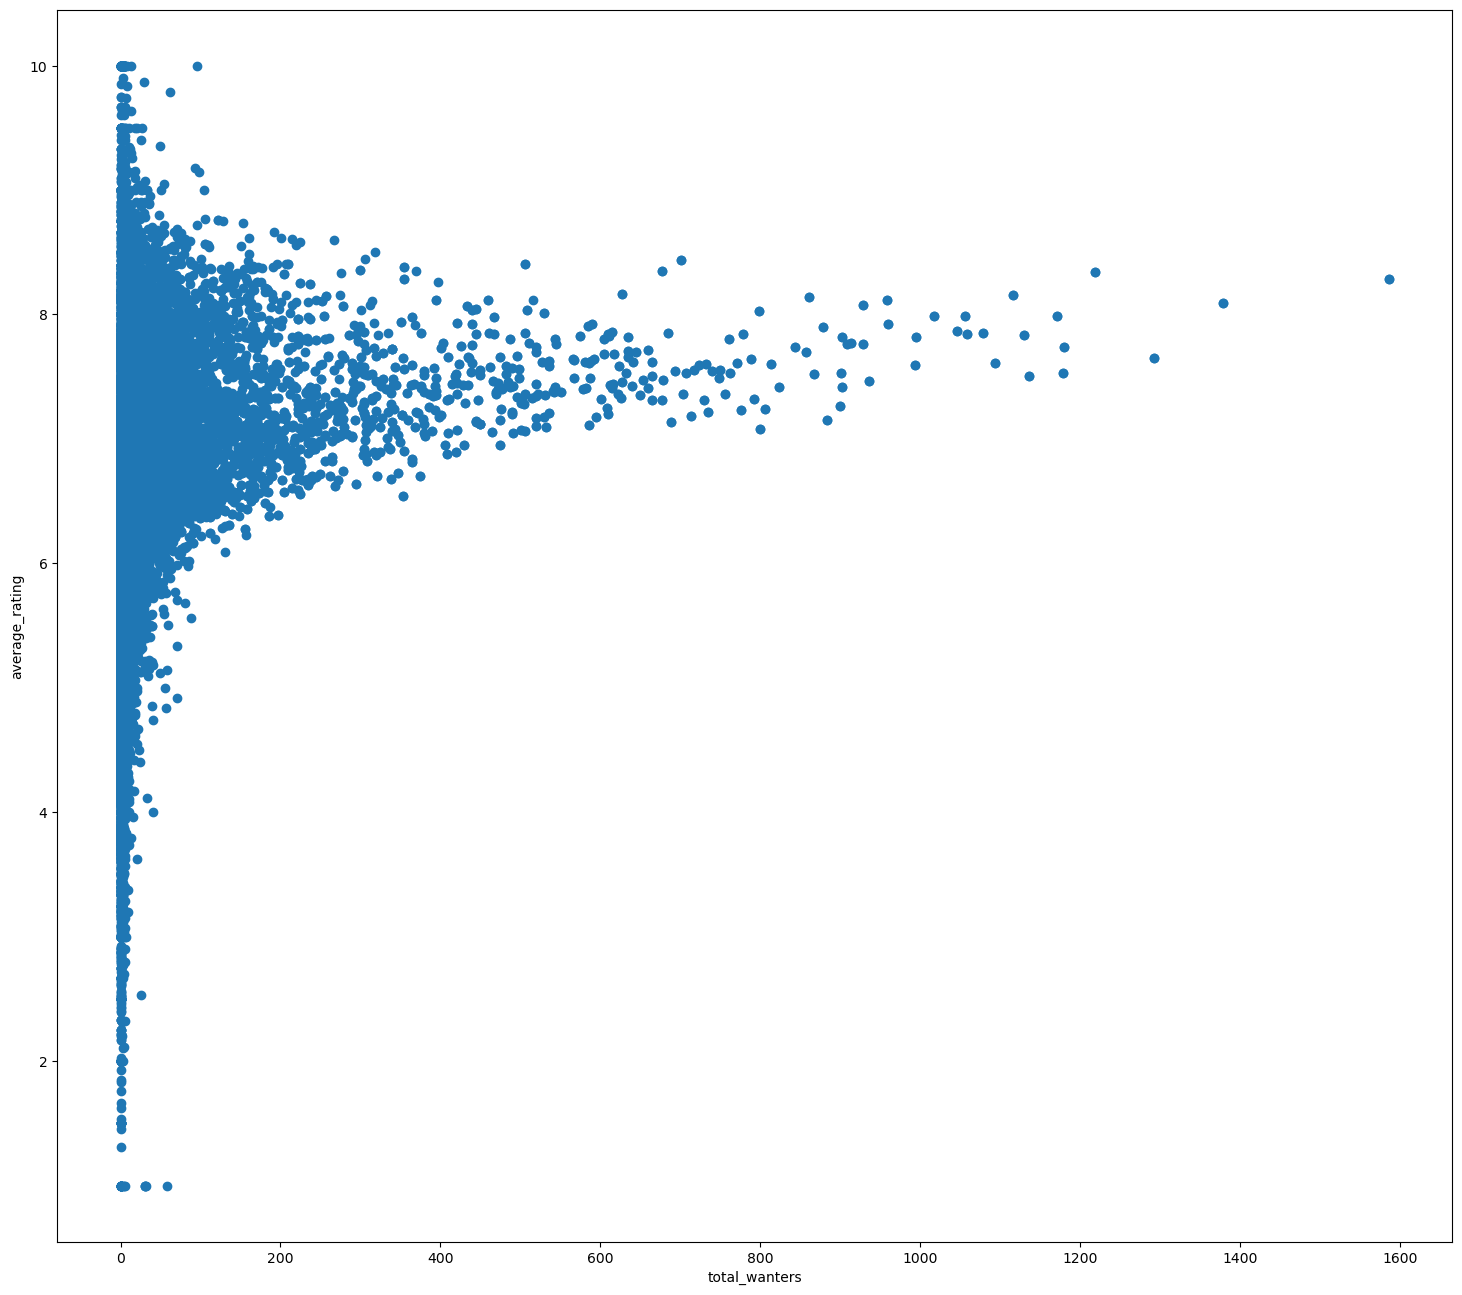

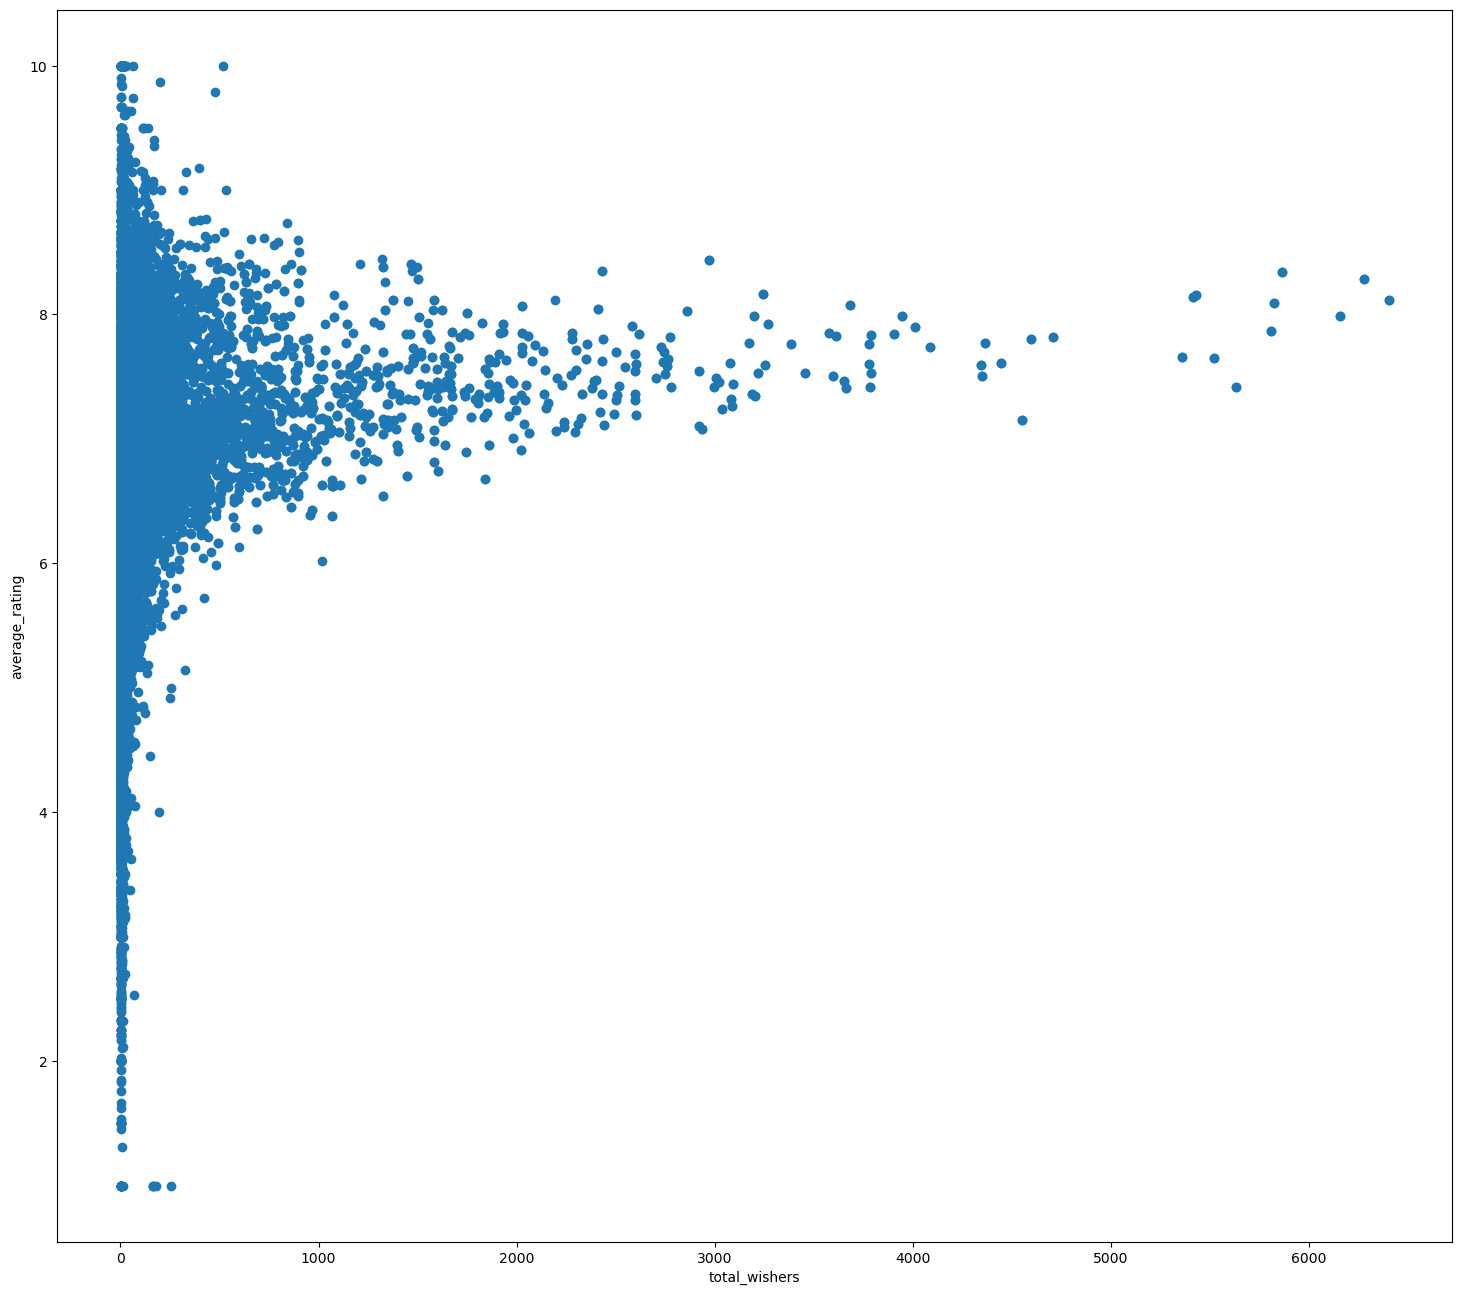

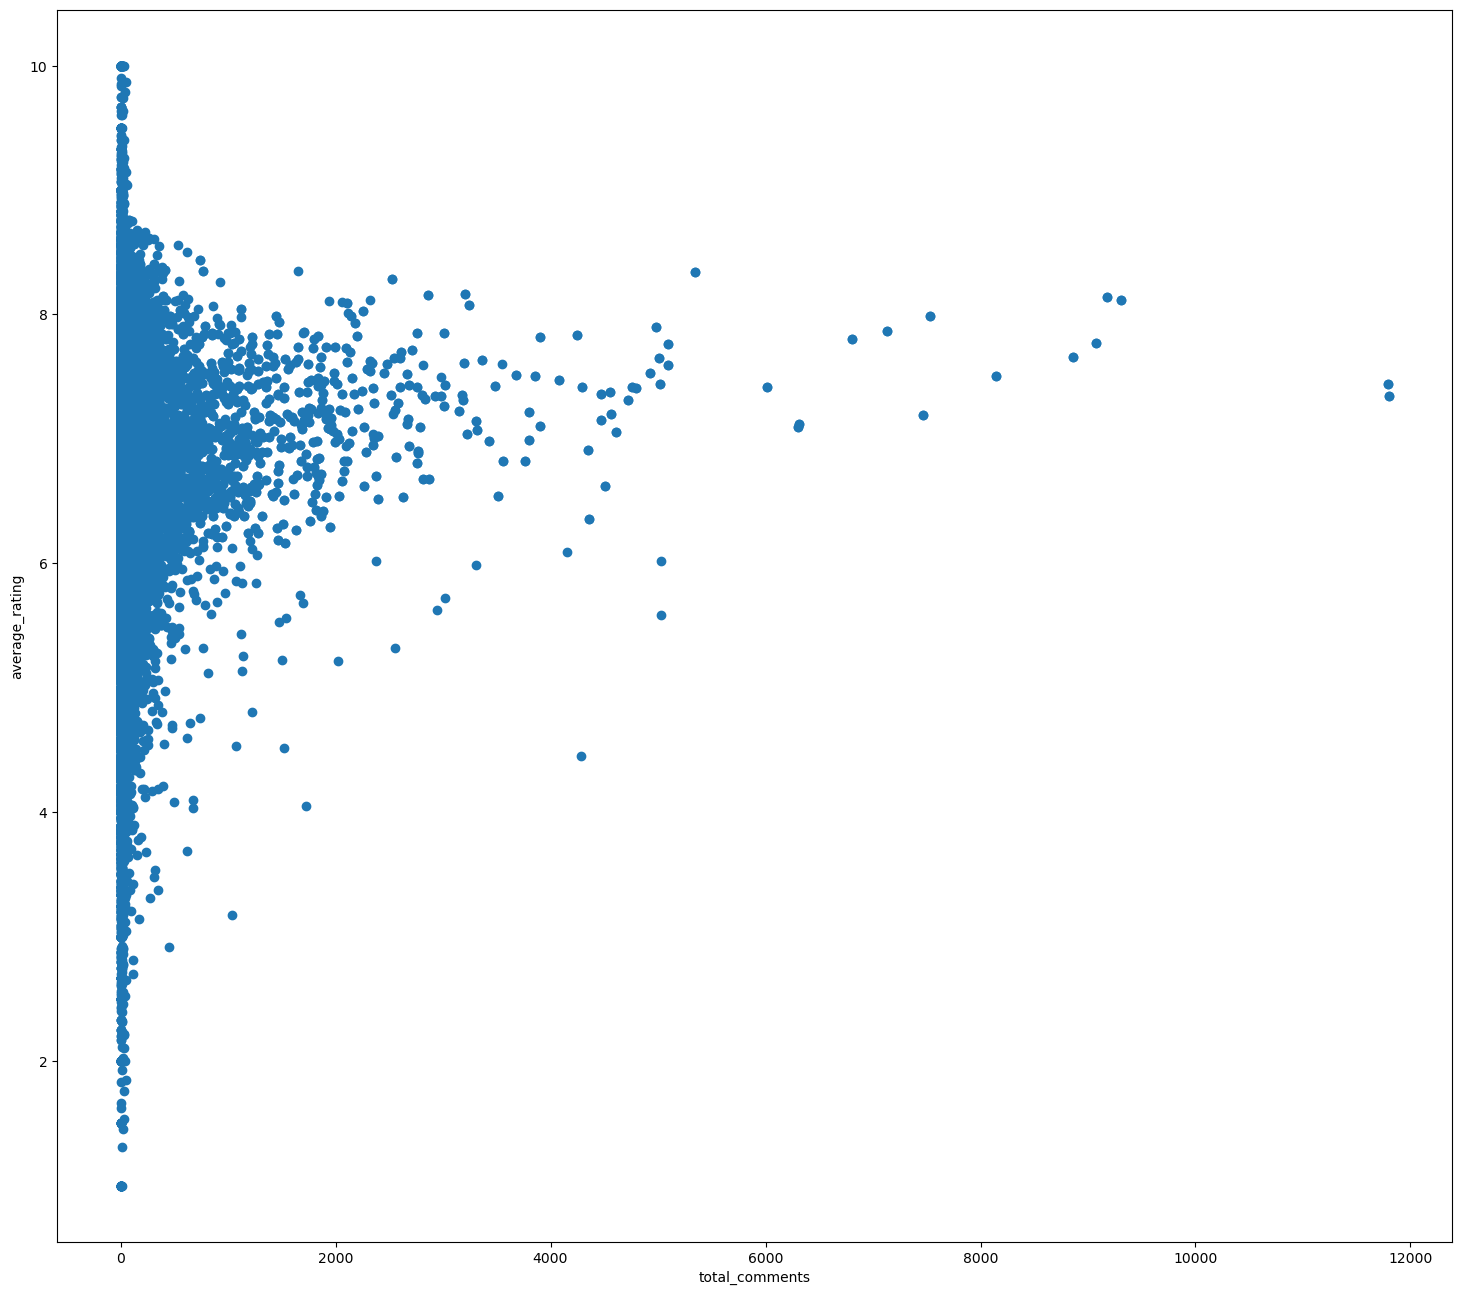

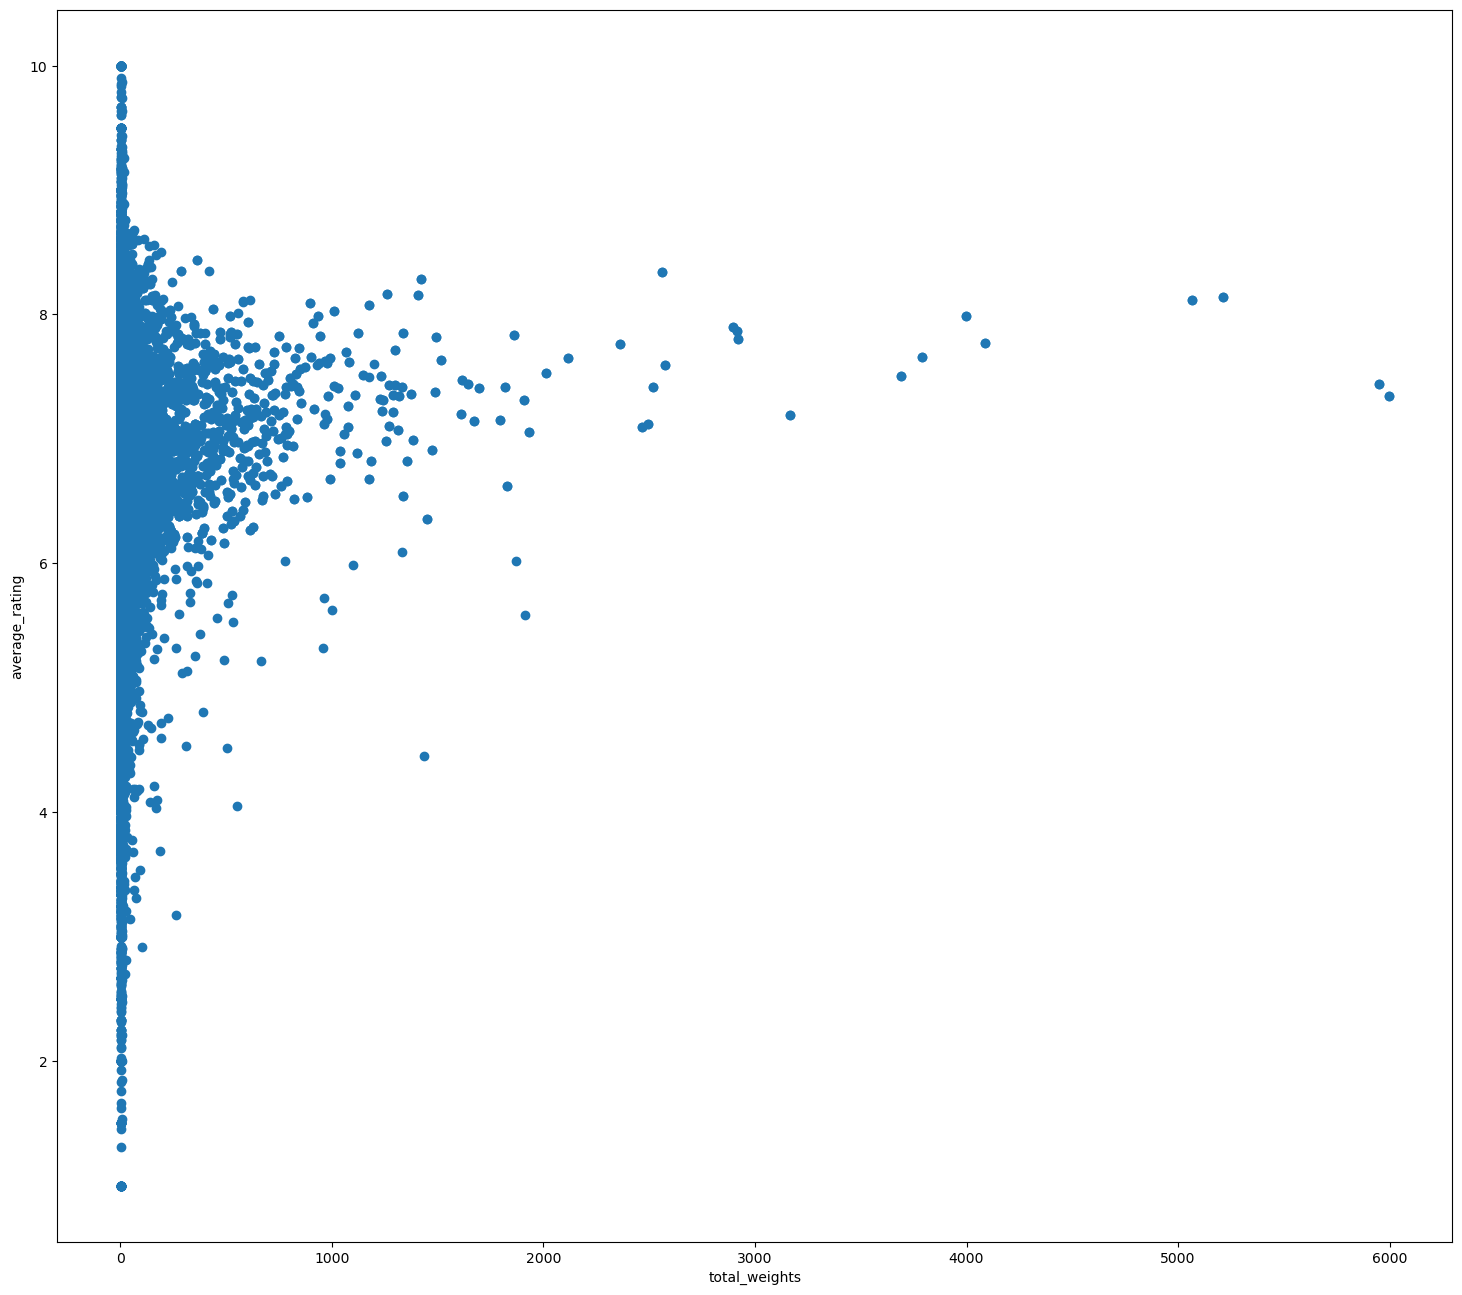

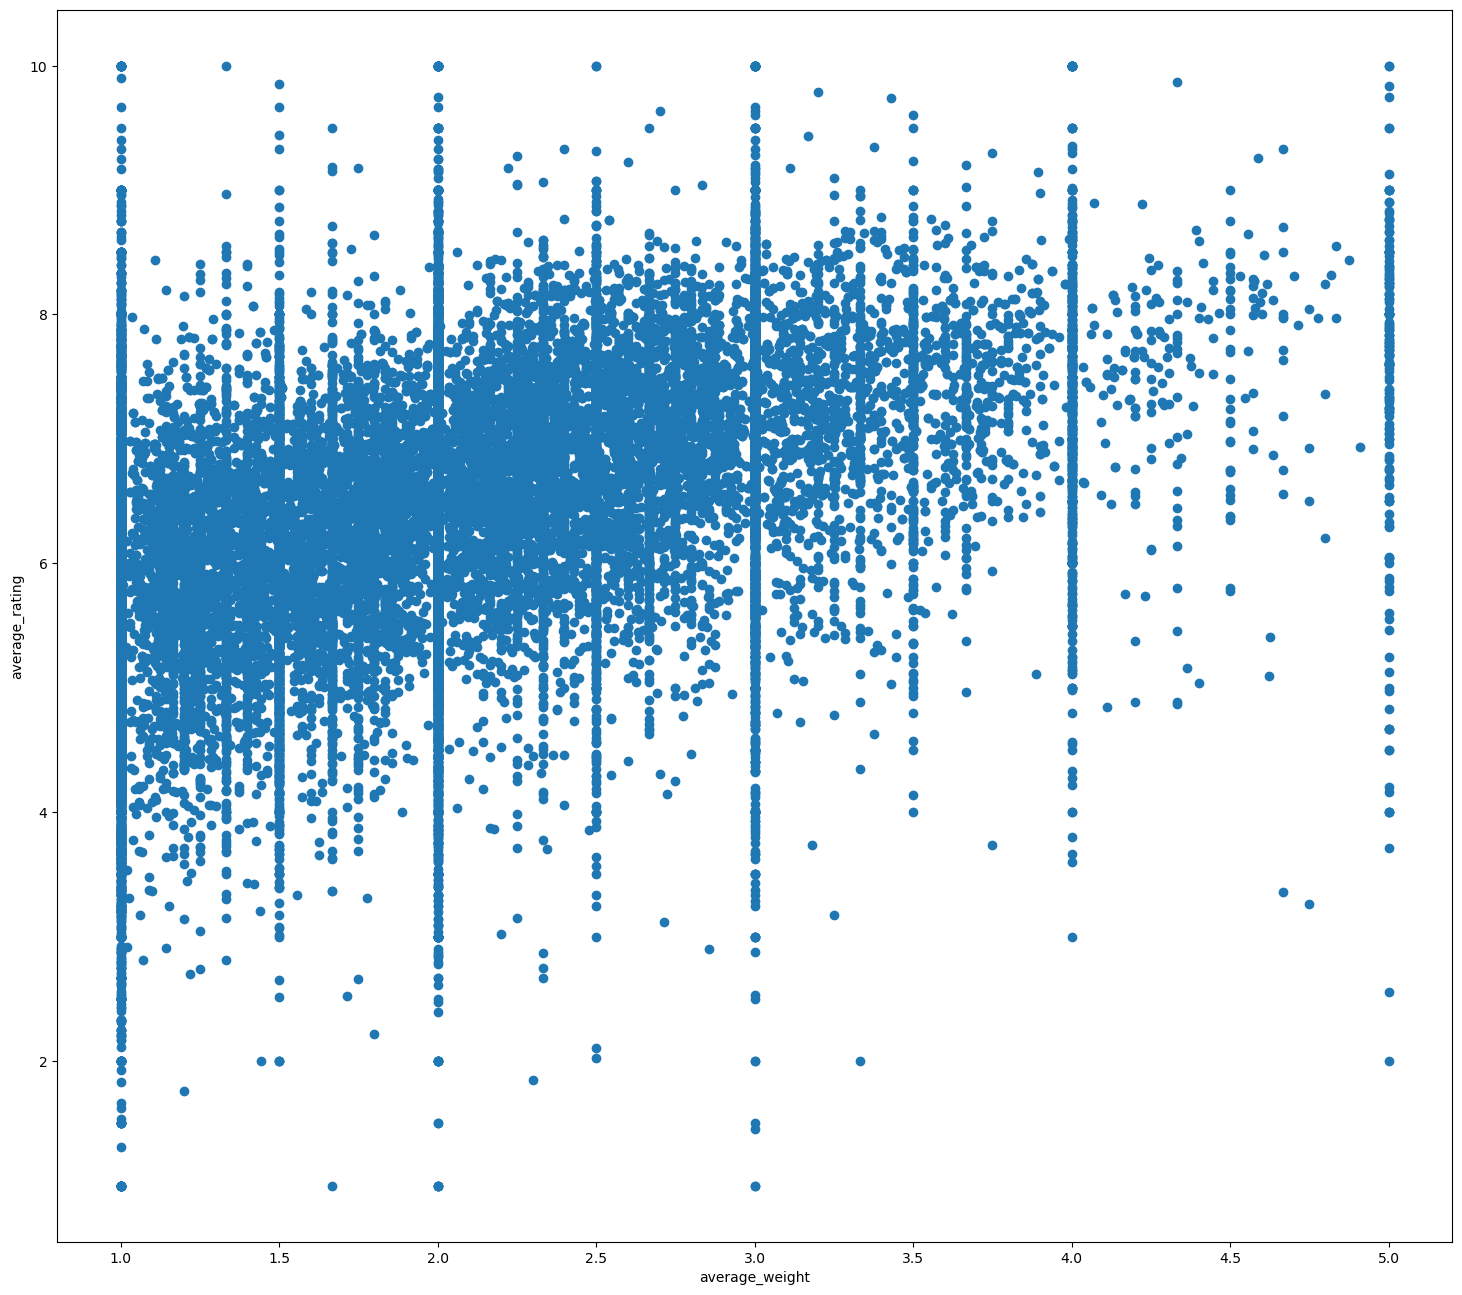

In [8]:
dfx2 = dfx.drop(columns=["average_rating"])
dfy2 = dfx["average_rating"]

for i in range(len(dfx2.columns)):
    x2 = dfx2.iloc[:,i].values
    y2 = dfy2.values
    plt.figure(figsize=(18,16))
    plt.scatter(x2, y2)
    plt.xlabel(dfx2.columns[i])
    plt.ylabel("average_rating")
    plt.show()

After data modification, the graphs plotted are dont have extreme values. The sparsity of the plots are reduced to a great extent.

Plots also show that there is no general trend between average_rating and most of the other dependent variables.  To further analyse the relationship between dependent and independent variables, a coorelation heatmap is plotted.

<AxesSubplot:>

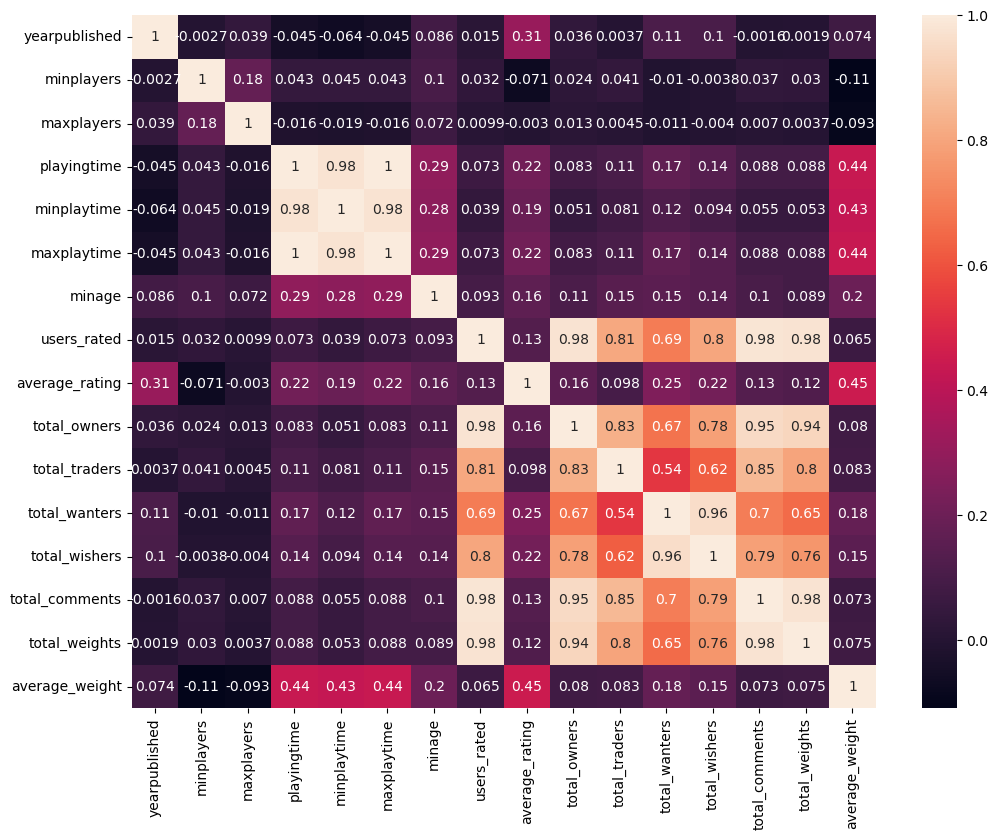

In [9]:
correlation_matrix = dfx.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,annot=True)

Data preprocessing is the concept of changing the raw data into a clean data set. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm. Data must be in a format appropriate for ML.

In [10]:
scalar=MinMaxScaler() #Transform features by scaling each feature to a given range.

'''This estimator scales and translates each feature individually such that it is in the given range 
on the training set, e.g. between zero and one.'''

'''X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min'''

df_fill = pd.DataFrame(scalar.fit_transform(dfx), columns=dfx.columns)

X_df=df_fill.drop(target,axis=1)
y_df=df_fill[target]


## The regression models used for prediction are Linear Regression, Logistic Regression, Random Forest and Gradient Boosting Regression. Data-set is split into two parts, namely the training data and the testing data. This splitting is done at random. Training data contains 75 percent of all the available data while the testing data contains the remaining 25 percent.

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.25,random_state=69)

# Generate the training set.  Set random_state to be able to replicate results. To increase the model performance
#train = games.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
#test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.

print(y_train.shape)
print(y_test.shape)

(20852,)
(6951,)


In [12]:
def getAccuracy(testSet, predictions):
    testSet=np.round_(np.array(testSet), decimals = 1) #test set converted to array
    predictions=np.round_(np.array(predictions), decimals = 1) #predictions converted to array
    correct = 0  #To check how many correct values we get
    
    #Traverse through the test set and check alongside values in predictions and compare
    for i in range(len(testSet)):
        if predictions[i] == testSet[i]:
            correct = correct + 1
    return (correct/float(len(testSet))*100)

def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

## Linear Regression

In [13]:
# Perform linear regression from scratch
class linear_regression:
    #The constructor method, l is the ridge constant
    def __init__(self,l=0.01): #l is ridge constant
        self.l=l
    #trains the algorithm on the training data
    def fit(self,X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X)) #Multi dimensional array + Helps in horizontal stacking of arrays
        self.theta = np.linalg.inv(X.T @ X + self.l*np.eye(X.shape[1])) @ X.T @ y #Linear Regression Formula
        
        return self
    #For the observations X, returns the predicted values y
    def predict( self, X ):
         return X_test @ self.theta[1:] + self.theta[0]

We are adding something called as Ridge Regularization. If we don't do that we would get the error: **LinAlgError: Singular matrix**

The error "LinAlgError: Singular matrix" occurs when the matrix being inverted is not invertible, which can happen if the matrix is not full rank. In the context of the linear regression function "linear_regression(X, y)", this error could occur when the design matrix X is not full rank.

One of the ways to solve this is  to add a small positive constant to the diagonal of the matrix before inversion. This is known as "ridge regularization" and can help to prevent overfitting by adding a small amount of bias to the model.



In [14]:
model = linear_regression()
model.fit(X_train, y_train)
y_pred =model.predict(X_test)

In [15]:
mean_squared_error(y_pred, y_test)

0.010971256851228793

In [30]:
acc1=getAccuracy(y_pred,y_test)
print(acc1)

41.13077255071213


## Logistic Regression

In [17]:
class LogisticRegression() :
    #This is the constructor method, which takes two parameters: the learning rate and the number of iterations.
    '''These parameters are used to control the rate at which the model learns and the number of times the model 
    updates its weights during training.'''
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training
    '''This method is used to train the model on the provided dataset. 
    The method takes in two parameters: 'X' represents the feature set and 'Y' represents the label set.'''
    
    '''The method initializes the weight vector 'W' and bias 'b' with zeros. 
    Then, it performs gradient descent for the specified number of iterations by calling the 
    helper function 'update_weights'.'''
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape     #X.shape' returns the dimensions of the 'X' array
        # weight initialization (Weight vector initialized with zeroes)      
        self.W = np.zeros( self.n )  # The weight vector has the same number of elements as the number of features.      
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()      #Function updates weight vector 'W' and bias term 'b' based on the gradients    
        return self
      
    # Helper function to update weights in gradient descent
    '''The update_weights() function is called for the specified number of iterations, 
    and in each iteration, it updates the weights and bias.'''
    
    '''These updates are done by using the gradients of the cost function, which is calculated using the 
    sigmoid function and the current values of the weight and bias. 
    
    This process is repeated specified number of iterations is reached.'''
      
    def update_weights( self ) :
        '''The sigmoid function takes in the dot product of the feature set 'self.X' and the weight vector 'self.W' 
        plus the bias term 'self.b' as input. 
        It returns a probability value between 0 and 1, which represents the likelihood of the input 
        belonging to the positive class.'''
        
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) #computes output of the sigmoid function
          
        # calculate gradients        
        tmp = ( A - self.Y.T ) #difference between predicted values from 'A' and the true label set 'self.Y'
        tmp = np.reshape( tmp, self.m )  # reshapes the 'tmp' variable 
        dW = np.dot( self.X.T, tmp ) / self.m   #calculates the gradient of the weight vector 'W'.      
        db = np.sum( tmp ) / self.m   
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
    
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )            
        return Z

In [18]:
model = LogisticRegression( learning_rate = 0.1, iterations = 1000 )
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [19]:
mean_squared_error(y_pred, y_test)

0.010971256851228793

In [32]:
acc2=getAccuracy(y_test,ypred)
print(acc2)

35.04531722054381


## Random Forest

Implementation of the Random Forest algorithm from scratch using the scikit-learn library's DecisionTreeRegressor class.

In [21]:
'''A class that implements Random Forest algorithm from scratch.'''
class RandomForest:
    import sklearn.tree as tree
    #constructor of the class
    def __init__(self, num_trees=25,max_depth=7): #Constructor of the class 
        self.num_trees = num_trees #number of trees
        self.max_depth = max_depth #The maximum depth of the tree, it is set to 7 by default.
        self.decision_trees = []  #store individually trained decision trees


    '''The fit method is used to train the Random Forest classifier. It takes two parameters:
        X: np.array, features of the training data
        y: np.array, target variable of the training data'''
    def fit(self, X, y):

        # Reset the decision trees
        #If any decision trees were already stored in the decision_trees attribute, it clears the list.
        if len(self.decision_trees) > 0:
            self.decision_trees = []
            
        # Build each tree of the forest
        num_built = 1
        while num_built <= self.num_trees:
            dt=tree.DecisionTreeRegressor(criterion='squared_error',max_depth=self.max_depth)
                # Obtain data sample
            _X = X.sample(frac= num_built,replace = True)
            _y = y.sample(frac= num_built,replace = True)
                # Train the Decision tree
            dt.fit(_X,_y)
                # Save the classifier(Appending the decision tree to the decision_tree)
            self.decision_trees.append(dt)
            num_built += 1
    
    #Make predictions on new instances.
    def predict(self, X):
        # Make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))
        
        # Reshape so we can find the most common value
        y = np.swapaxes(a=y, axis1=0, axis2=1)
        
        # Use majority voting for the final prediction
        predictions = []
        for preds in y:
            counter = Counter(preds)
            predictions.append(counter.most_common(1)[0][0])
        
        #print(predictions)
        return predictions



In [22]:
model = RandomForest()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
mean_squared_error(y_pred, y_test)

0.016560424055304054

In [33]:
acc3=getAccuracy(y_test,y_pred)
print(acc3)

41.13077255071213


## Gradient Boosting Regression

Gradient Boosting regression is an ensemble machine learning technique that combines multiple weak learners (such as Linear Regression) to form a strong model for prediction. It is a type of boosting algorithm that is based on the idea of iteratively adding models to the ensemble in order to correct the errors made by the previous models. The basic idea is to fit a simple model to the data, then use the residuals (the difference between the true values and the model's predictions) to fit a new model. The predictions from the new model are then added to the predictions from the previous models to form the final ensemble prediction.

The technique is called "gradient boosting" because it minimizes a loss function (such as mean squared error or mean absolute error) by gradient descent. At each iteration, a new model is fit to the negative gradient of the loss function with respect to the current ensemble predictions.

In [25]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []
        self.intercept_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize the model with the mean of the target variable
        self.intercept_ = np.mean(y)
        y_pred = np.full(n_samples, self.intercept_)
        for i in range(self.n_estimators):
            # Compute the negative gradient of the loss function
            gradient = y - y_pred
            # Fit a linear regression model to the negative gradient
            estimator = LinearRegression()
            estimator.fit(X, gradient)
            self.estimators.append(estimator)
            # Update the predictions
            y_pred += self.learning_rate * estimator.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.intercept_)
        for estimator in self.estimators:
            y_pred += self.learning_rate * estimator.predict(X)
        return y_pred


In [26]:
# Create an instance of the GradientBoostingRegressor class
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model to the data
gbr.fit(X_train, y_train)

# Make predictions on new data
y_pred = gbr.predict(X_test)

In [27]:
mean_squared_error(y_pred, y_test)

0.010969729331583593

In [34]:
acc4=getAccuracy(y_test,y_pred)
print(acc4)

41.13077255071213


## Inferences

Text(0.5, 1.0, 'Models and their Accuracy')

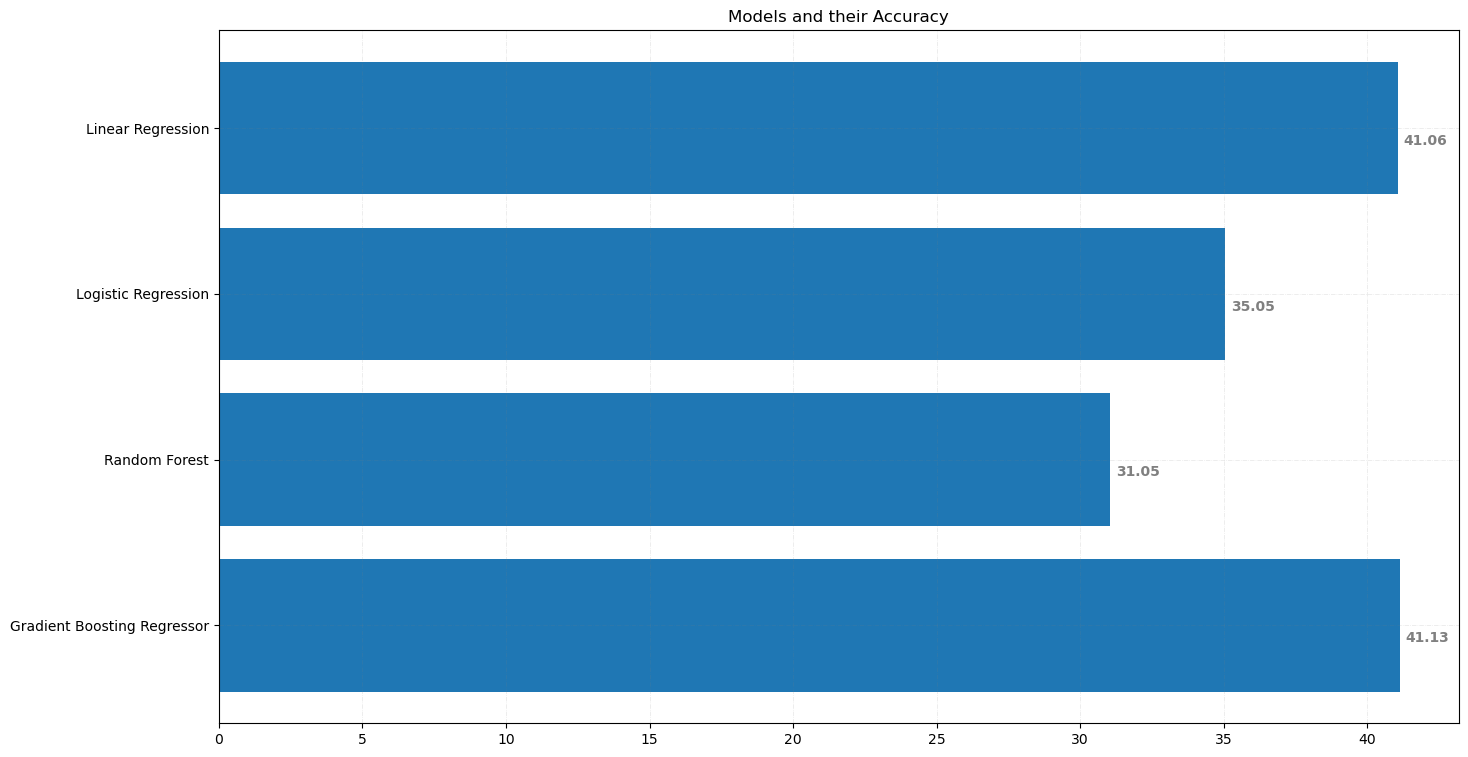

In [29]:
Y = [acc1,acc2,acc3,acc4]
X = ['Linear Regression','Logistic Regression','Random Forest','Gradient Boosting Regressor']

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(X,Y)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
#Add Plot Title
ax.set_title('Models and their Accuracy',loc ='center', )

From the above plots we can see that Gradient Boosting Regressor gives us the highest accuracy. But Linear Regression is also very good for our data. Random Forest gives the lowest accuracy. 

Gradient Boosting Regressor as the name suggests gives us the highest accuracy. 